#Created by -Vandana Anil Kadam

#Attrition is the departure of employees from the organization for any reason (voluntary or involuntary), including resignation, termination, death or retirement.

# For calculating attrition, you divide the average number of departures in a given period over the average number of employees in that period and then multiply by 100 to get the percentage. This represents the number of people left after departures: in other words, how much manpower you're losing.


#Problem Statement-On given observations can you build up successful machine learning model which can predict that employees are going to leave their job or not,which is Attrition.

#In our dataset we have 1470 samples and 35 attributes.Attrition is the target variable and This is binary classification problem.


#import important libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
wa=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
wa.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
wa.shape

(1470, 35)

#Feature Description

In [ ]:
#Describing  numerical data
wa.describe(include=[np.number])

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00",...,"1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00","1,470.00"
mean,36.92,802.49,9.19,2.91,1.00,"1,024.87",2.72,65.89,2.73,2.06,...,2.71,80.00,0.79,11.28,2.80,2.76,7.01,4.23,2.19,4.12
std,9.14,403.51,8.11,1.02,0.00,602.02,1.09,20.33,0.71,1.11,...,1.08,0.00,0.85,7.78,1.29,0.71,6.13,3.62,3.22,3.57
min,18.00,102.00,1.00,1.00,1.00,1.00,1.00,30.00,1.00,1.00,...,1.00,80.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,30.00,465.00,2.00,2.00,1.00,491.25,2.00,48.00,2.00,1.00,...,2.00,80.00,0.00,6.00,2.00,2.00,3.00,2.00,0.00,2.00
50%,36.00,802.00,7.00,3.00,1.00,"1,020.50",3.00,66.00,3.00,2.00,...,3.00,80.00,1.00,10.00,3.00,3.00,5.00,3.00,1.00,3.00
75%,43.00,"1,157.00",14.00,4.00,1.00,"1,555.75",4.00,83.75,3.00,3.00,...,4.00,80.00,1.00,15.00,3.00,3.00,9.00,7.00,3.00,7.00
max,60.00,"1,499.00",29.00,5.00,1.00,"2,068.00",4.00,100.00,4.00,5.00,...,4.00,80.00,3.00,40.00,6.00,4.00,40.00,18.00,15.00,17.00


In [ ]:
#Describing non numerical data(categorical features)
wa.describe(exclude=[np.number])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [ ]:
len(wa)

1470

In [ ]:
#Setting decimal format
#Suppose we only concern 2 digits after the decimal point, we can use this option to format the display as follows:
pd.set_option('display.float_format',  '{:,.2f}'.format)

In [ ]:
#stastical data description of columns
wa.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,"1,470.00",36.92,9.14,18.00,30.00,36.00,43.00,60.00
DailyRate,"1,470.00",802.49,403.51,102.00,465.00,802.00,"1,157.00","1,499.00"
DistanceFromHome,"1,470.00",9.19,8.11,1.00,2.00,7.00,14.00,29.00
Education,"1,470.00",2.91,1.02,1.00,2.00,3.00,4.00,5.00
EmployeeCount,"1,470.00",1.00,0.00,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,"1,470.00","1,024.87",602.02,1.00,491.25,"1,020.50","1,555.75","2,068.00"
EnvironmentSatisfaction,"1,470.00",2.72,1.09,1.00,2.00,3.00,4.00,4.00
HourlyRate,"1,470.00",65.89,20.33,30.00,48.00,66.00,83.75,100.00
JobInvolvement,"1,470.00",2.73,0.71,1.00,2.00,3.00,3.00,4.00
JobLevel,"1,470.00",2.06,1.11,1.00,1.00,2.00,3.00,5.00


In [ ]:
#basic information with null counts and data types of each attribute
wa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
#Check last rows
wa.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [ ]:
#Total columns of our dataset
wa.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# data types of our dataset attributes
wa.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

#Data preprocessing

#Missing values-we have no missing values in our dataset,but we have to converting string in numeric values  while data preprocessing.

In [ ]:
#let's see how many nulls/missing values in our dataset percentages of each column
wa.isnull().mean()*100

Age                        0.00
Attrition                  0.00
BusinessTravel             0.00
DailyRate                  0.00
Department                 0.00
DistanceFromHome           0.00
Education                  0.00
EducationField             0.00
EmployeeCount              0.00
EmployeeNumber             0.00
EnvironmentSatisfaction    0.00
Gender                     0.00
HourlyRate                 0.00
JobInvolvement             0.00
JobLevel                   0.00
JobRole                    0.00
JobSatisfaction            0.00
MaritalStatus              0.00
MonthlyIncome              0.00
MonthlyRate                0.00
NumCompaniesWorked         0.00
Over18                     0.00
OverTime                   0.00
PercentSalaryHike          0.00
PerformanceRating          0.00
RelationshipSatisfaction   0.00
StandardHours              0.00
StockOptionLevel           0.00
TotalWorkingYears          0.00
TrainingTimesLastYear      0.00
WorkLifeBalance            0.00
YearsAtC

In [ ]:
#missing values in bool format specification
wa.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

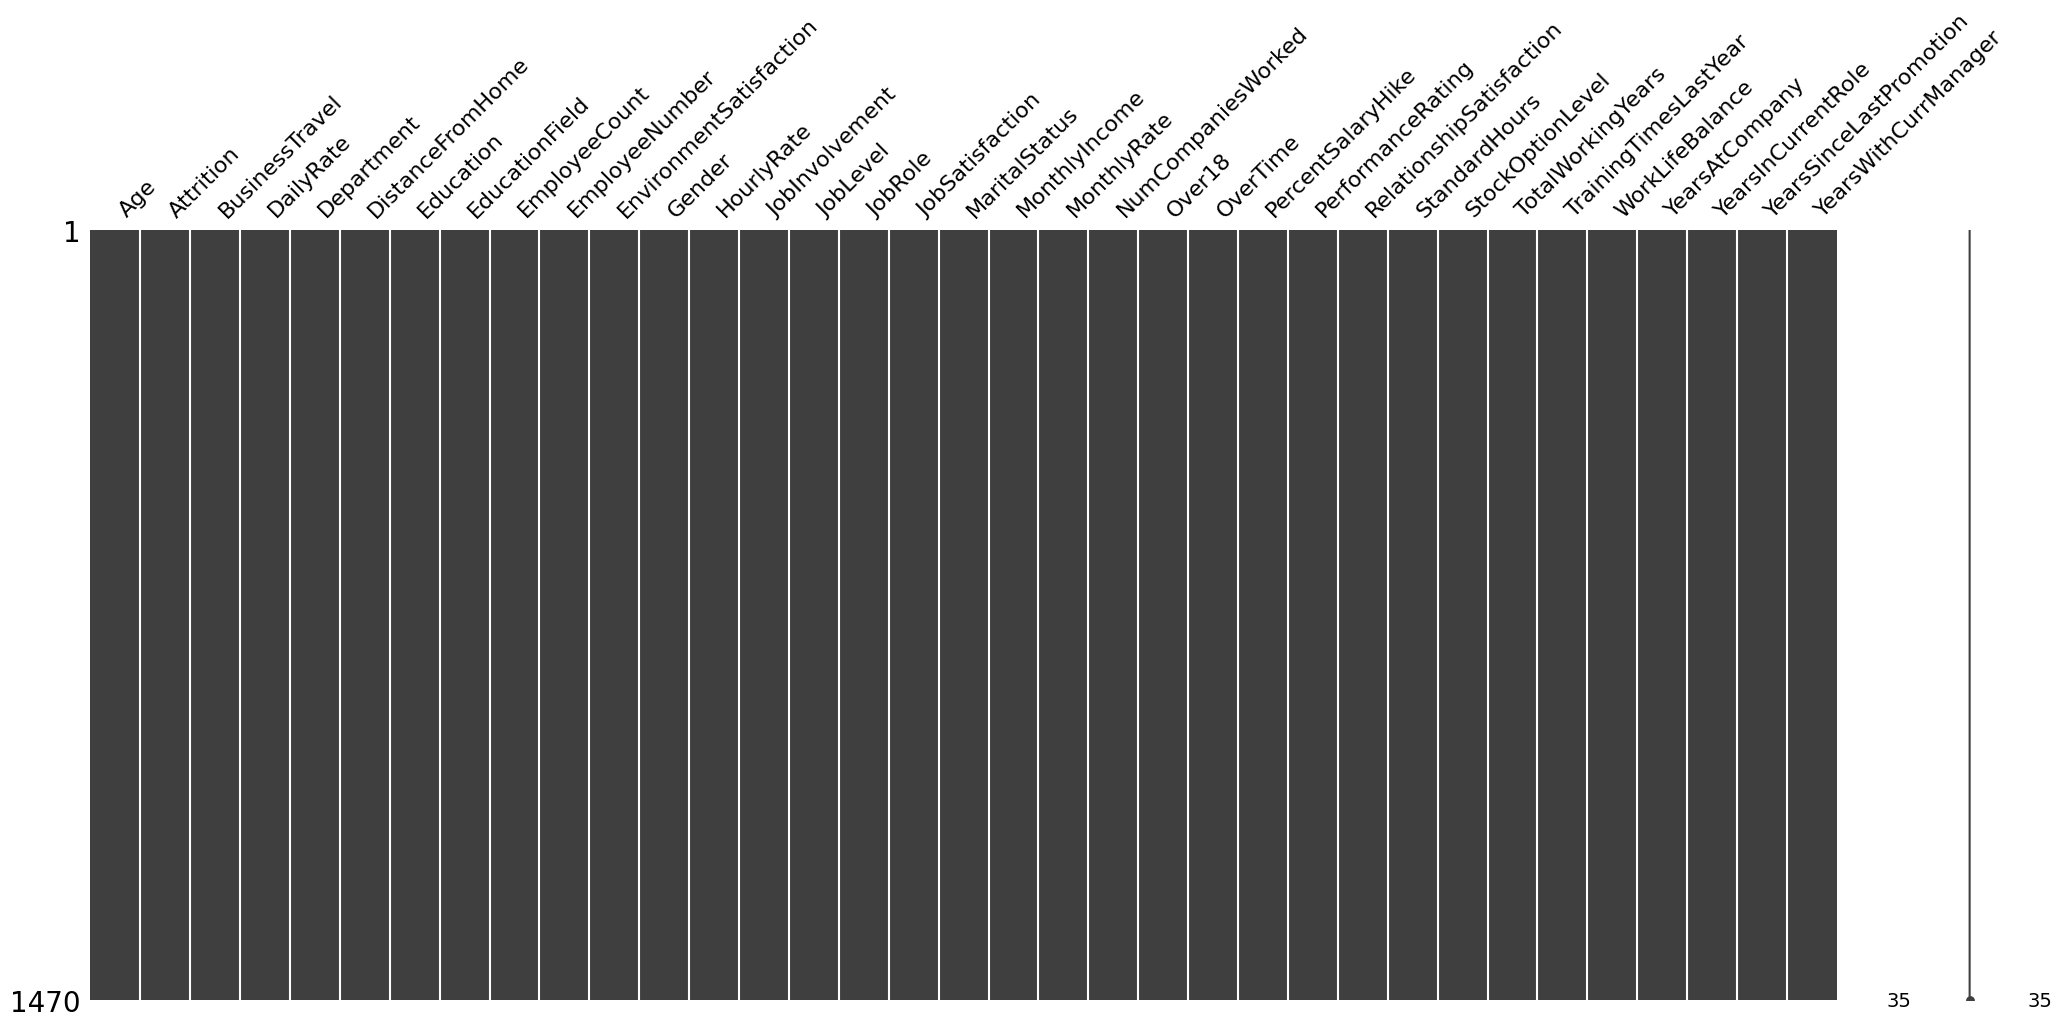

In [ ]:
#visualization of missing values using missingno
msno.matrix(wa)

<Axes: >

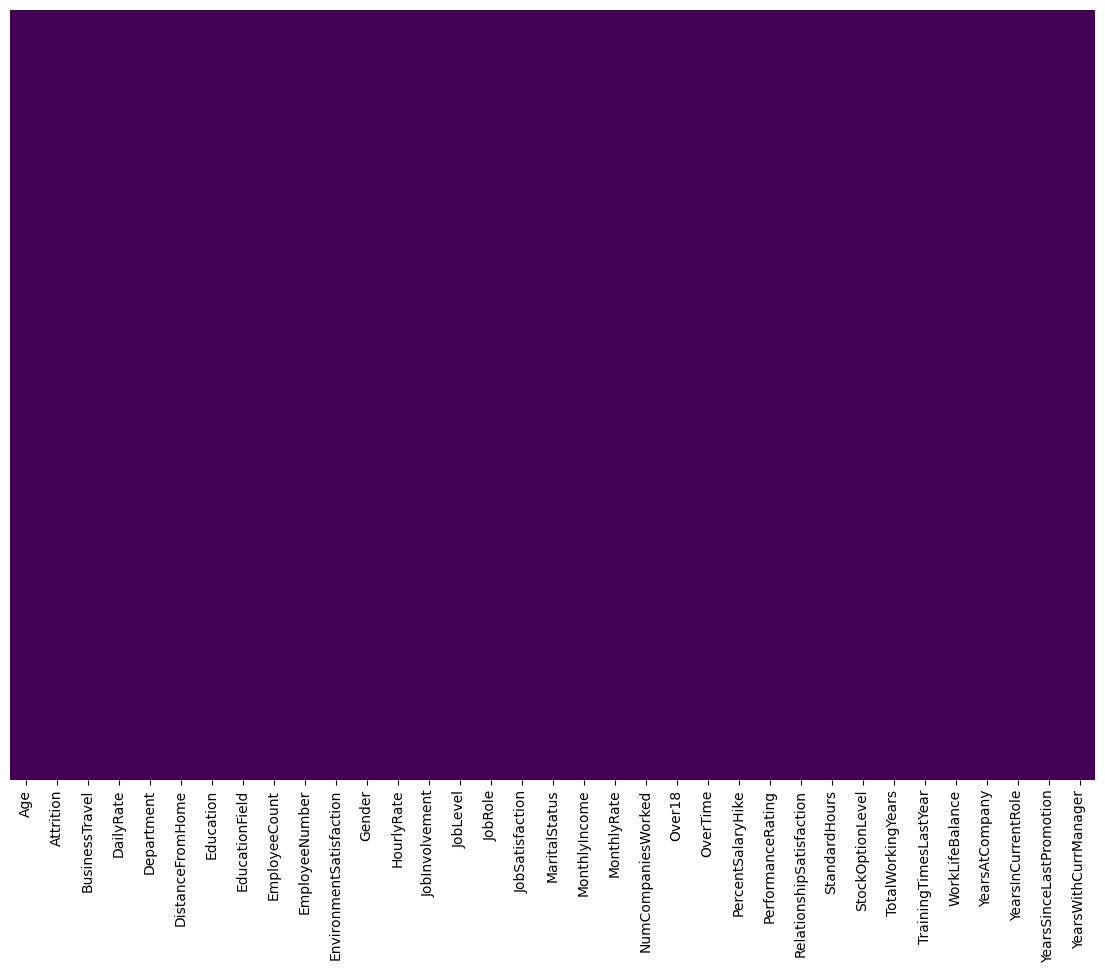

In [ ]:
#visualization of missing values using seaborn library
plt.figure(figsize=(14,10))
sns.heatmap(wa.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [ ]:
#actual calculation of missing values
wa.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#EDA-Exploratory Data Analysis

#Visualization of our each attribute.

#Target variable-"Attrition"

In [ ]:
len(wa["Attrition"].unique())

2

In [ ]:
wa["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
wa.groupby("Attrition").mean().T

Attrition,No,Yes
Age,37.56,33.61
DailyRate,812.50,750.36
DistanceFromHome,8.92,10.63
Education,2.93,2.84
EmployeeCount,1.00,1.00
EmployeeNumber,"1,027.66","1,010.35"
EnvironmentSatisfaction,2.77,2.46
HourlyRate,65.95,65.57
JobInvolvement,2.77,2.52
JobLevel,2.15,1.64


No     1233
Yes     237
Name: Attrition, dtype: int64


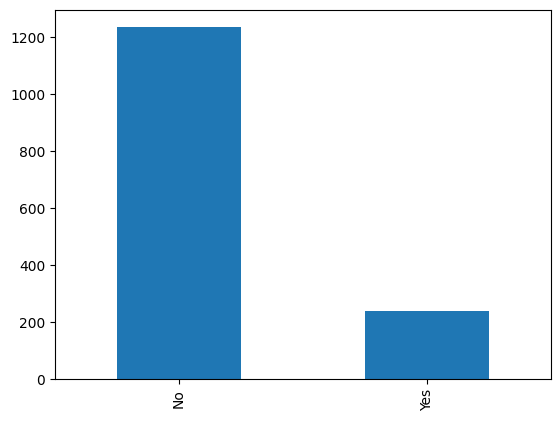

In [ ]:
#Target variable's value counts
print(wa["Attrition"].value_counts())
wa["Attrition"].value_counts().plot(kind="bar")
plt.show()

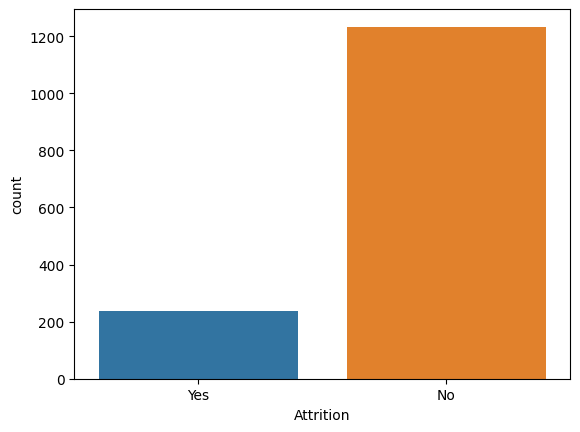

In [ ]:
#the target variable
sns.countplot(x=wa.Attrition)
plt.show()

#On the base on observations out of 1470 employees 1233 are not going to leave their job,but 237 people are leaving their job.

In [ ]:
#showing corelation of features to each other
wa.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.00,0.01,-0.00,0.21,NaN,-0.01,0.01,0.02,0.03,0.51,...,0.05,NaN,0.04,0.68,-0.02,-0.02,0.31,0.21,0.22,0.20
DailyRate,0.01,1.00,-0.00,-0.02,NaN,-0.05,0.02,0.02,0.05,0.00,...,0.01,NaN,0.04,0.01,0.00,-0.04,-0.03,0.01,-0.03,-0.03
DistanceFromHome,-0.00,-0.00,1.00,0.02,NaN,0.03,-0.02,0.03,0.01,0.01,...,0.01,NaN,0.04,0.00,-0.04,-0.03,0.01,0.02,0.01,0.01
Education,0.21,-0.02,0.02,1.00,NaN,0.04,-0.03,0.02,0.04,0.10,...,-0.01,NaN,0.02,0.15,-0.03,0.01,0.07,0.06,0.05,0.07
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.01,-0.05,0.03,0.04,NaN,1.00,0.02,0.04,-0.01,-0.02,...,-0.07,NaN,0.06,-0.01,0.02,0.01,-0.01,-0.01,-0.01,-0.01
EnvironmentSatisfaction,0.01,0.02,-0.02,-0.03,NaN,0.02,1.00,-0.05,-0.01,0.00,...,0.01,NaN,0.00,-0.00,-0.02,0.03,0.00,0.02,0.02,-0.00
HourlyRate,0.02,0.02,0.03,0.02,NaN,0.04,-0.05,1.00,0.04,-0.03,...,0.00,NaN,0.05,-0.00,-0.01,-0.00,-0.02,-0.02,-0.03,-0.02
JobInvolvement,0.03,0.05,0.01,0.04,NaN,-0.01,-0.01,0.04,1.00,-0.01,...,0.03,NaN,0.02,-0.01,-0.02,-0.01,-0.02,0.01,-0.02,0.03
JobLevel,0.51,0.00,0.01,0.10,NaN,-0.02,0.00,-0.03,-0.01,1.00,...,0.02,NaN,0.01,0.78,-0.02,0.04,0.53,0.39,0.35,0.38


<Axes: ylabel='Attrition'>

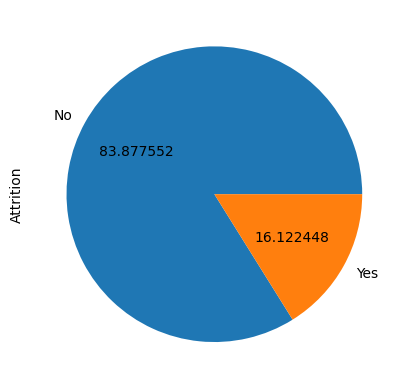

In [ ]:
wa["Attrition"].value_counts()[:5].plot(kind="pie",autopct="%2f")

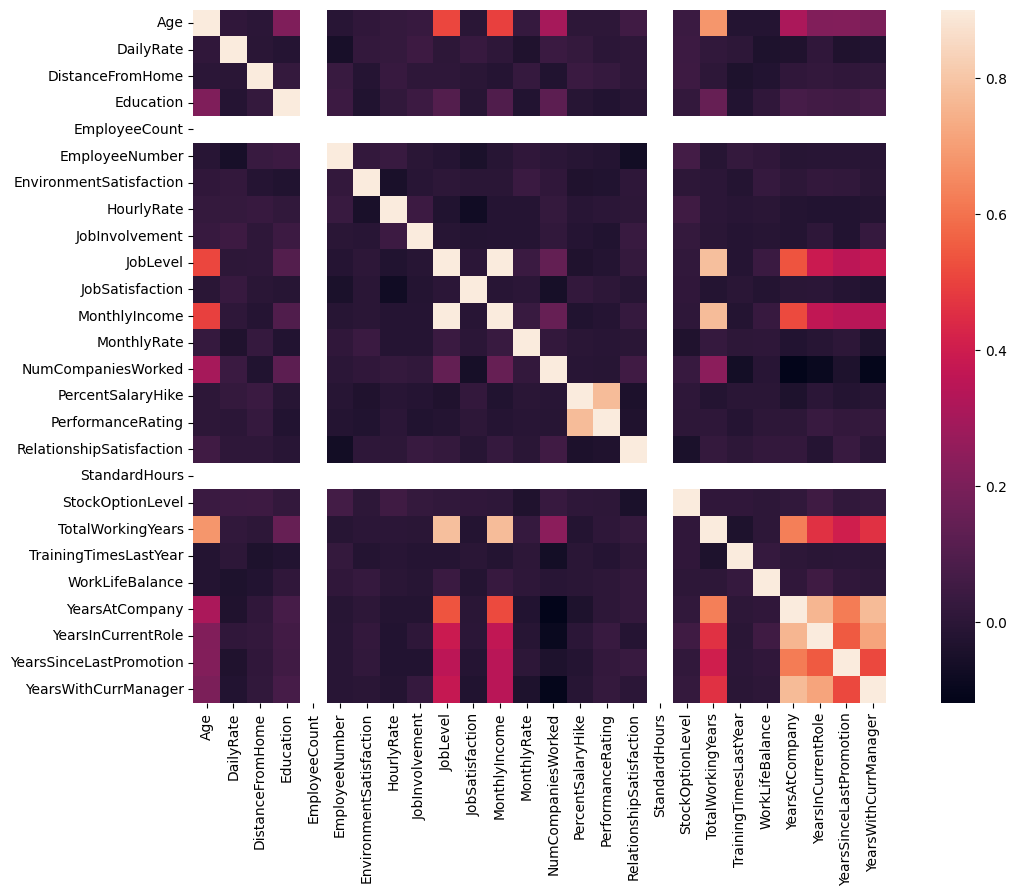

                           Age  DailyRate  DistanceFromHome  Education  \
Age                       1.00       0.01             -0.00       0.21   
DailyRate                 0.01       1.00             -0.00      -0.02   
DistanceFromHome         -0.00      -0.00              1.00       0.02   
Education                 0.21      -0.02              0.02       1.00   
EmployeeCount              NaN        NaN               NaN        NaN   
EmployeeNumber           -0.01      -0.05              0.03       0.04   
EnvironmentSatisfaction   0.01       0.02             -0.02      -0.03   
HourlyRate                0.02       0.02              0.03       0.02   
JobInvolvement            0.03       0.05              0.01       0.04   
JobLevel                  0.51       0.00              0.01       0.10   
JobSatisfaction          -0.00       0.03             -0.00      -0.01   
MonthlyIncome             0.50       0.01             -0.02       0.09   
MonthlyRate               0.03      -0

In [ ]:
#corelation metrics
corelation_metrics=wa.corr()
fig=plt.figure(figsize=(14,9))
sns.heatmap(corelation_metrics,vmax=.9,square=True)#annot=value
plt.show()
print(corelation_metrics)

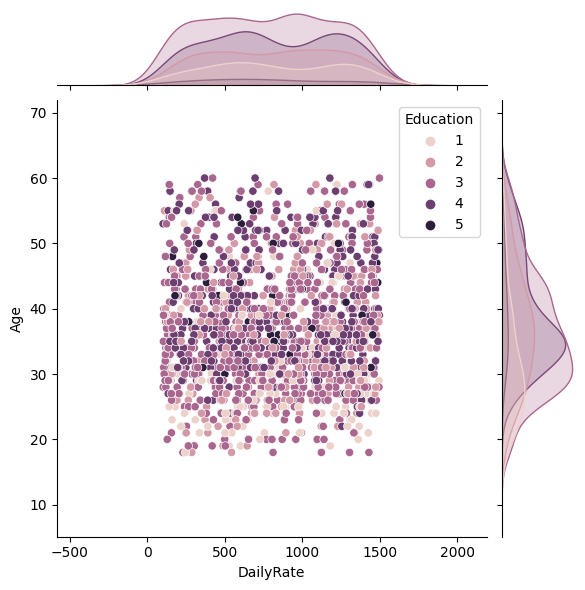

In [ ]:
sns.jointplot(x="DailyRate",y="Age",hue="Education",data=wa)
plt.show()

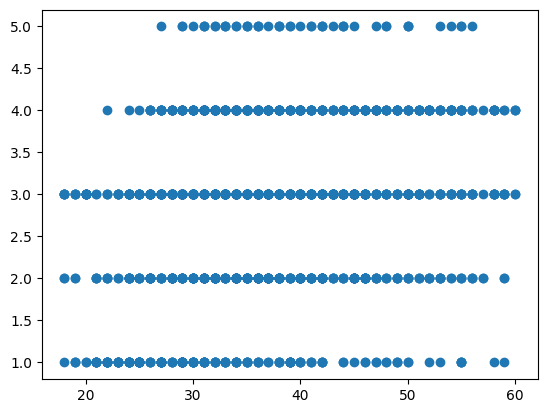

In [ ]:
plt.scatter(x="Age",y="Education",data=wa)
plt.show()

<Axes: >

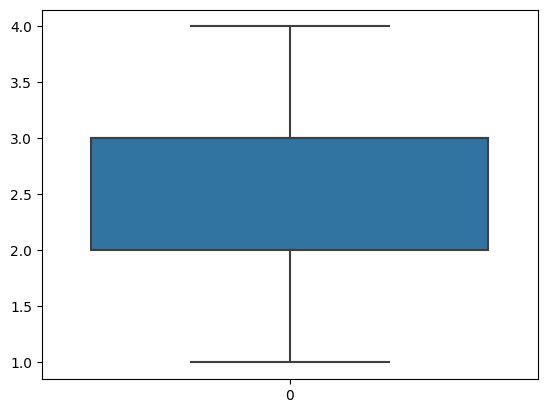

In [ ]:
sns.boxplot(wa.WorkLifeBalance)

<Axes: >

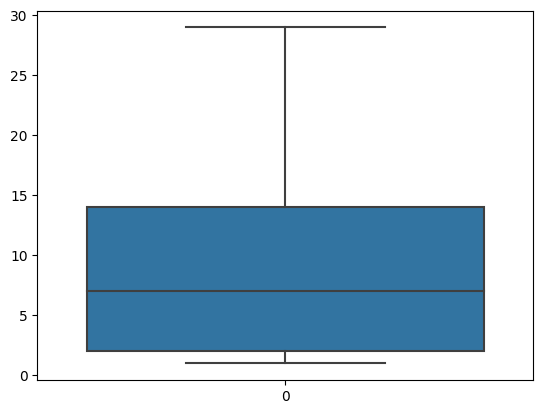

In [ ]:
sns.boxplot(wa.DistanceFromHome)

#   Analysis of important features

# AGE Analysis

In [ ]:
#the length of this attribute
wa.Age

0       41
1       49
2       37
3       33
4       27
        ..
1465    36
1466    39
1467    27
1468    49
1469    34
Name: Age, Length: 1470, dtype: int64

In [ ]:
# unique values in the variable
len(wa["Age"].unique())

43

In [ ]:
#value_counts of the attribute
wa["Age"].value_counts()

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

In [ ]:
#mean value of each and every important attribute related to this attribute.
wa.groupby("Age").mean().T

Age,18,19,20,21,22,23,24,25,26,27,...,51,52,53,54,55,56,57,58,59,60
DailyRate,747.62,548.44,819.45,762.85,806.94,707.93,863.12,768.08,844.77,907.33,...,953.79,796.67,856.68,727.67,646.23,904.43,385.50,690.50,992.30,833.20
DistanceFromHome,6.12,10.56,7.09,9.08,8.44,9.14,11.88,8.77,10.23,7.50,...,7.68,9.11,7.63,10.28,8.91,9.43,13.75,8.79,6.40,11.80
Education,2.50,2.11,2.64,1.62,1.81,1.86,2.12,1.92,2.64,2.67,...,3.26,3.22,3.05,3.50,3.00,3.21,2.75,3.36,2.80,3.60
EmployeeCount,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,"1,053.62",675.67,"1,021.00",951.54,869.25,"1,225.50","1,011.38","1,005.31",981.05,"1,001.96",...,692.37,865.72,918.16,"1,032.67","1,042.77","1,151.57",689.00,"1,020.14",556.90,956.80
EnvironmentSatisfaction,2.75,2.44,3.18,2.69,2.81,2.86,2.50,2.54,2.38,2.90,...,2.42,2.94,2.68,3.00,2.82,2.93,2.50,3.14,2.50,2.00
HourlyRate,68.12,63.56,61.91,67.31,69.81,66.07,62.62,65.96,62.38,64.92,...,67.11,62.83,57.79,64.61,64.45,77.29,80.00,60.14,64.10,69.80
JobInvolvement,2.88,2.44,2.64,2.69,2.75,3.21,2.81,2.85,2.56,2.77,...,2.53,2.56,2.95,3.00,2.82,2.86,3.25,2.57,2.60,2.60
JobLevel,1.00,1.00,1.00,1.00,1.12,1.07,1.27,1.50,1.31,1.48,...,2.79,3.00,3.42,3.00,3.59,2.50,2.75,2.93,2.50,3.00
JobSatisfaction,3.25,2.56,2.64,2.69,2.94,2.43,2.77,2.69,2.77,2.60,...,2.79,2.89,2.95,2.78,2.64,2.29,3.50,2.64,3.20,2.20


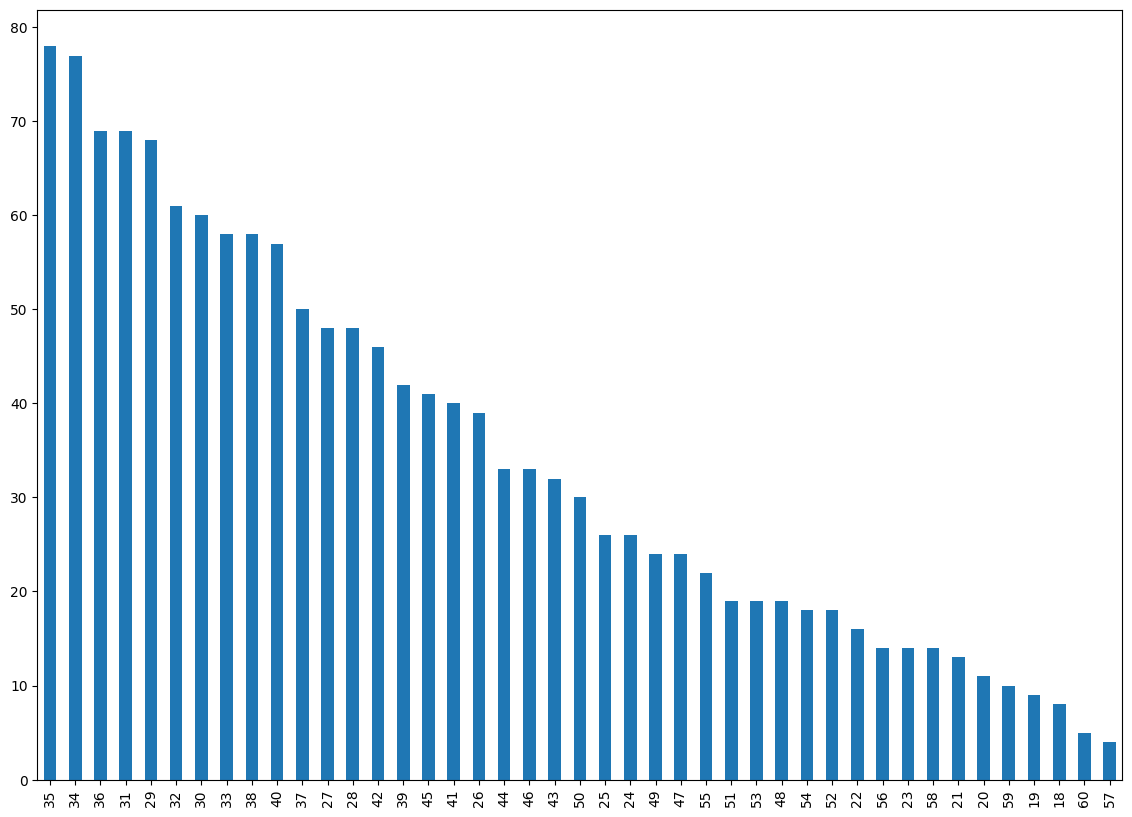

In [ ]:
#'Age' variable's value counts in bar plotting       sns.countplot(data=data, x="MaritalStatus", hue="Attrition")
plt.figure(figsize=(14,10))
wa["Age"].value_counts().plot(kind="bar")
plt.show()

<Axes: ylabel='Age'>

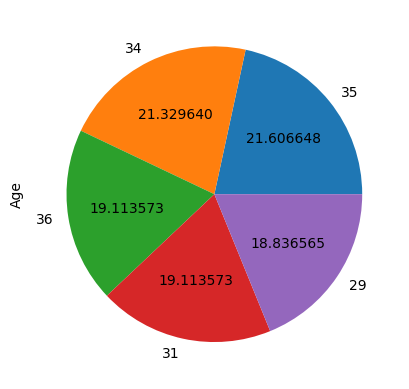

In [ ]:
#pie chart showing basic 5 values in percentages
wa["Age"].value_counts()[:5].plot(kind="pie",autopct="%2f")

<Axes: xlabel='Age', ylabel='Count'>

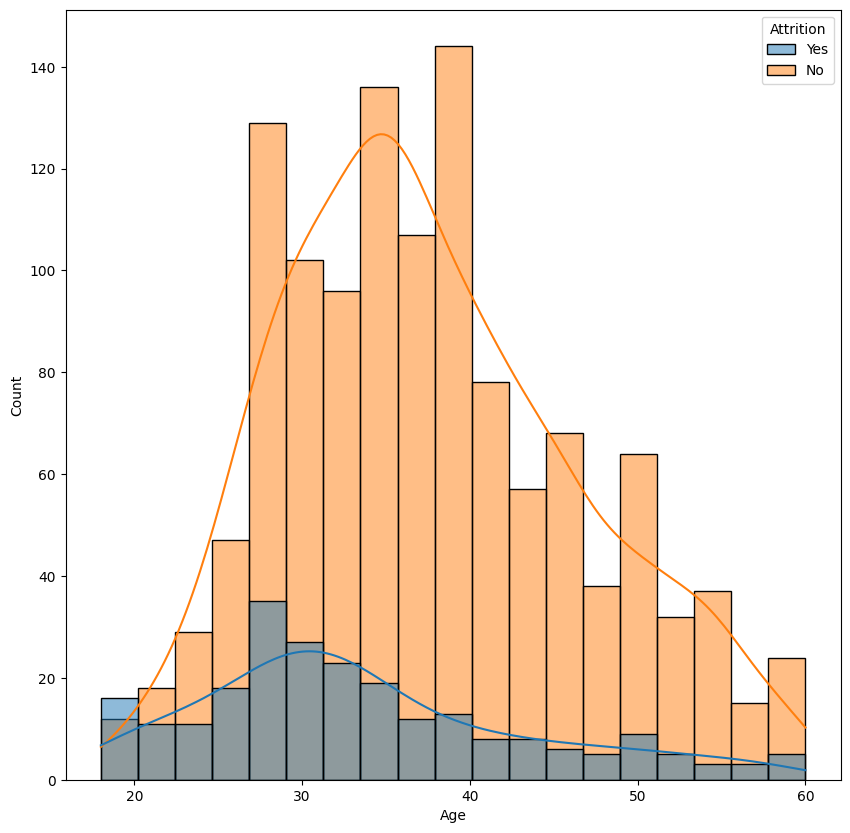

In [ ]:
#the comparing of each other age and attrition
plt.figure(figsize=(10,10))
sns.histplot(x='Age',hue='Attrition',data=wa,kde=True)

# the range of age are 18 - 60 the Company seems to be highly depended on segment of employees younger than 40 years old.26to28 age of employee are in high attrition range
#comparing male and female employee males are more than female at workplace.
#married status employees are in less attrition than unmarried and divorced employee.those who are single ,wants to leave he company.

we can see that ‘sales executive’, ‘sales representative’, and ‘lab technician’ are more likely to leave compared to other roles.

# BusinessTravel Analysis

# business travel analysis give us information about how many employees use business travel,employees who travelled rarely had the highest attrition level, whereas the employees who were not required to travel had the least chance of attrition.

In [ ]:
wa.BusinessTravel

0           Travel_Rarely
1       Travel_Frequently
2           Travel_Rarely
3       Travel_Frequently
4           Travel_Rarely
              ...        
1465    Travel_Frequently
1466        Travel_Rarely
1467        Travel_Rarely
1468    Travel_Frequently
1469        Travel_Rarely
Name: BusinessTravel, Length: 1470, dtype: object

In [ ]:
len(wa["BusinessTravel"].unique())

3

In [ ]:
wa["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [ ]:
wa.groupby("BusinessTravel").mean().T

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Age,36.62,36.45,37.09
DailyRate,816.96,792.63,803.02
DistanceFromHome,9.76,9.28,9.09
Education,2.93,2.90,2.92
EmployeeCount,1.00,1.00,1.00
EmployeeNumber,"1,064.63","1,014.90","1,021.79"
EnvironmentSatisfaction,2.73,2.69,2.73
HourlyRate,64.87,65.10,66.25
JobInvolvement,2.63,2.74,2.74
JobLevel,2.04,2.01,2.08


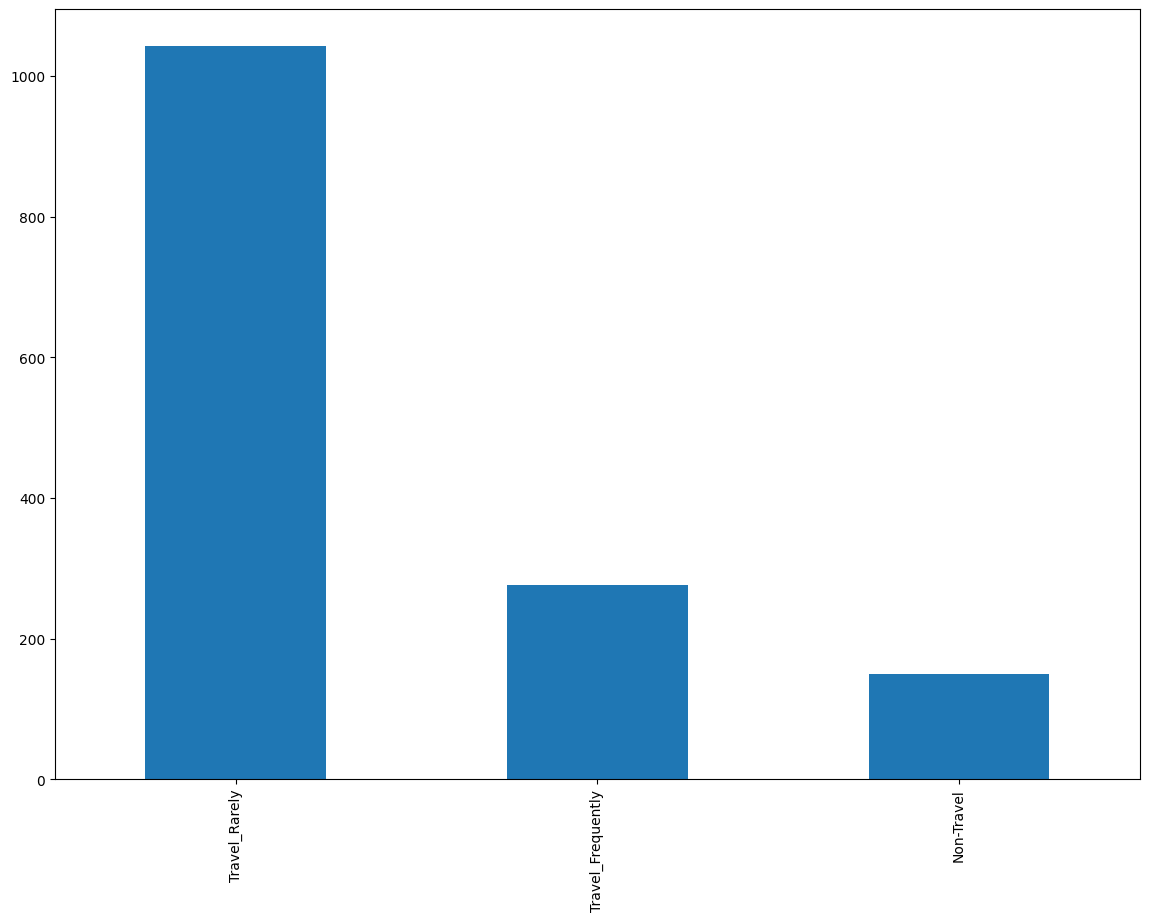

In [ ]:
#'Age' variable's value counts
plt.figure(figsize=(14,10))
wa["BusinessTravel"].value_counts().plot(kind="bar")
plt.show()

<Axes: ylabel='BusinessTravel'>

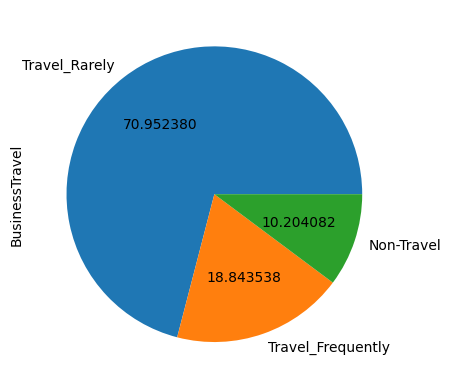

In [ ]:
wa["BusinessTravel"].value_counts()[:5].plot(kind="pie",autopct="%2f")

<Axes: xlabel='BusinessTravel', ylabel='Count'>

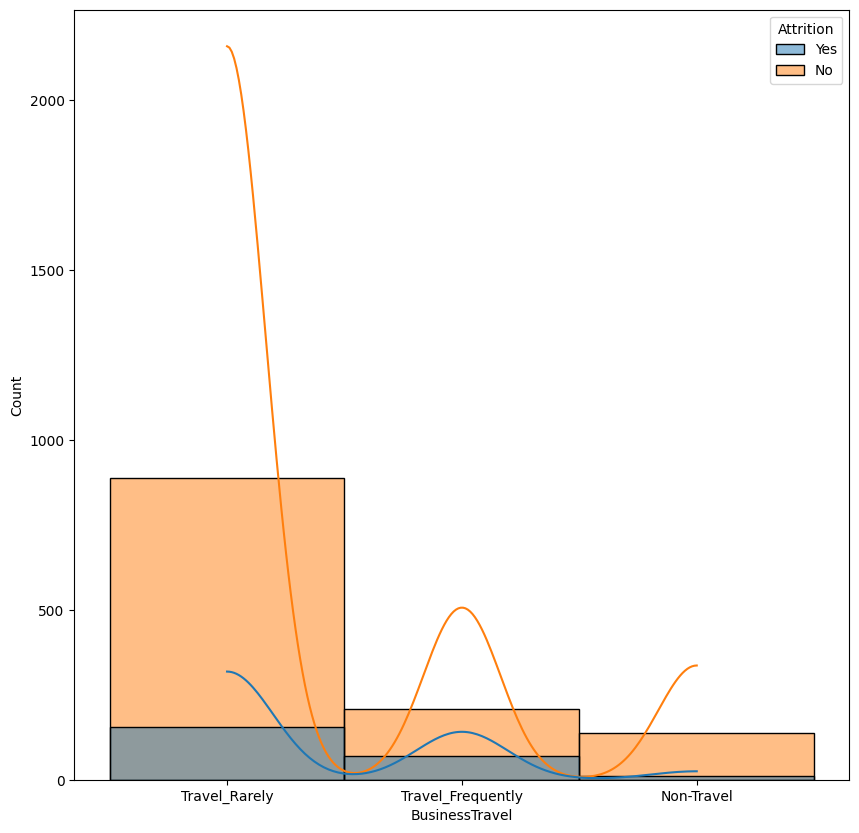

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(x='BusinessTravel',hue='Attrition',data=wa,kde=True)

#3-4 attributes impacts on attrition mostly like --
#Age
#MonthlyIncome,
#Performancerating
#PercentsalaryHike
#EnvironmentSatisfaction

#Attriton affected by these attributes
#Age
#MonthlyIncome,
#Performancerating
#Business travel
#Education,Education field
#EnvironmentSatisfaction
#Job level,job satisfaction,job involvement
#Marital status
#PercentSalaryHike
#Relationship Satisfaction
#overtime.

#PercentSalaryHike Analysis

In [ ]:
wa.PercentSalaryHike

0       11
1       23
2       15
3       11
4       12
        ..
1465    17
1466    15
1467    20
1468    14
1469    12
Name: PercentSalaryHike, Length: 1470, dtype: int64

In [ ]:
len(wa["PercentSalaryHike"].unique())

15

In [ ]:
wa["PercentSalaryHike"].value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

In [ ]:
wa.groupby("PercentSalaryHike").mean().T

PercentSalaryHike,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
Age,37.23,36.66,35.93,37.38,37.42,37.79,37.28,37.07,36.08,37.22,36.71,36.95,36.71,37.57,36.61
DailyRate,819.21,766.50,767.06,817.60,779.22,827.69,805.48,812.25,896.54,802.49,813.08,782.30,922.71,761.19,703.78
DistanceFromHome,8.98,8.99,8.92,8.18,10.50,10.09,9.06,10.16,8.55,9.07,9.29,9.05,11.71,10.81,10.39
Education,2.88,2.94,2.79,3.02,2.98,3.13,2.95,2.89,2.84,2.84,2.85,2.89,2.96,2.76,2.72
EmployeeCount,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,"1,013.60","1,018.22","1,046.20","1,049.50","1,030.67","1,015.78","1,049.98",967.31,"1,076.88","1,037.96","1,070.19",898.80,837.50,"1,010.38","1,203.61"
EnvironmentSatisfaction,2.80,2.68,2.75,2.72,2.84,2.64,2.77,2.72,2.66,2.55,2.79,2.64,2.64,2.67,2.56
HourlyRate,66.75,64.53,67.02,66.90,64.67,65.00,62.18,66.12,67.86,68.51,64.33,63.11,70.75,62.19,66.17
JobInvolvement,2.76,2.79,2.70,2.67,2.60,2.83,2.88,2.76,2.72,2.69,2.54,2.80,2.57,2.71,2.78
JobLevel,2.21,2.07,1.95,2.14,2.16,2.04,1.95,2.01,1.99,1.76,2.15,2.07,1.96,2.05,2.22


<Axes: xlabel='PercentSalaryHike', ylabel='Count'>

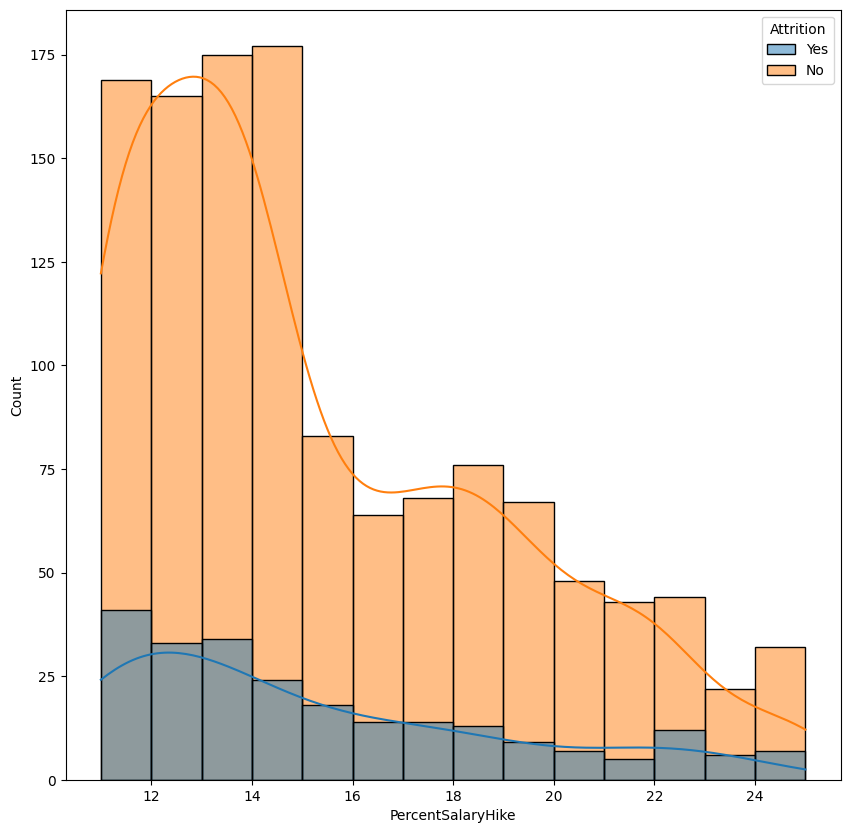

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(x='PercentSalaryHike',hue='Attrition',data=wa,kde=True)

#DailyRate Analysis

In [ ]:
wa.DailyRate

0       1102
1        279
2       1373
3       1392
4        591
        ... 
1465     884
1466     613
1467     155
1468    1023
1469     628
Name: DailyRate, Length: 1470, dtype: int64

In [ ]:
len(wa["DailyRate"].unique())

886

In [ ]:
wa["DailyRate"].value_counts()

691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64

In [ ]:
wa.groupby("DailyRate").mean().T

DailyRate,102,103,104,105,106,107,109,111,115,116,...,1480,1482,1485,1488,1490,1492,1495,1496,1498,1499
Age,53.00,28.00,35.00,39.00,31.00,40.00,30.00,43.00,29.00,35.50,...,35.00,47.00,37.67,44.00,43.50,40.00,41.67,28.50,39.00,60.00
DistanceFromHome,23.00,24.00,2.00,9.00,2.00,10.00,5.00,9.00,13.00,18.50,...,3.50,5.00,18.33,1.00,6.00,20.00,6.33,1.00,21.00,28.00
Education,4.00,3.00,3.00,3.00,3.00,3.00,3.00,2.67,3.00,2.00,...,2.50,5.00,2.00,5.00,3.00,4.00,3.00,2.00,4.00,3.00
EmployeeCount,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,901.00,19.00,"1,569.00","2,022.00",424.00,"1,239.00","1,017.00",517.00,"1,487.00","1,624.00",...,"1,060.00",447.00,"1,040.67",68.00,"1,147.25","1,092.00","1,264.67",847.00,"1,390.00",573.00
EnvironmentSatisfaction,4.00,3.00,1.00,4.00,1.00,2.00,2.00,2.67,1.00,2.00,...,3.50,4.00,3.00,2.00,3.75,1.00,2.67,2.50,1.00,3.00
HourlyRate,72.00,50.00,69.00,87.00,62.00,84.00,60.00,70.00,51.00,64.50,...,47.00,42.00,79.00,75.00,37.50,61.00,86.33,66.50,44.00,80.00
JobInvolvement,3.00,2.00,3.00,3.00,2.00,2.00,3.00,2.33,3.00,2.50,...,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,2.00,2.00
JobLevel,4.00,1.00,1.00,5.00,2.00,2.00,1.00,2.00,2.00,1.50,...,2.00,5.00,2.00,2.00,2.25,3.00,1.67,1.50,2.00,3.00
JobSatisfaction,4.00,3.00,1.00,4.00,1.00,2.00,2.00,2.67,2.00,3.00,...,3.00,3.00,3.33,1.00,3.25,4.00,3.00,3.00,4.00,1.00


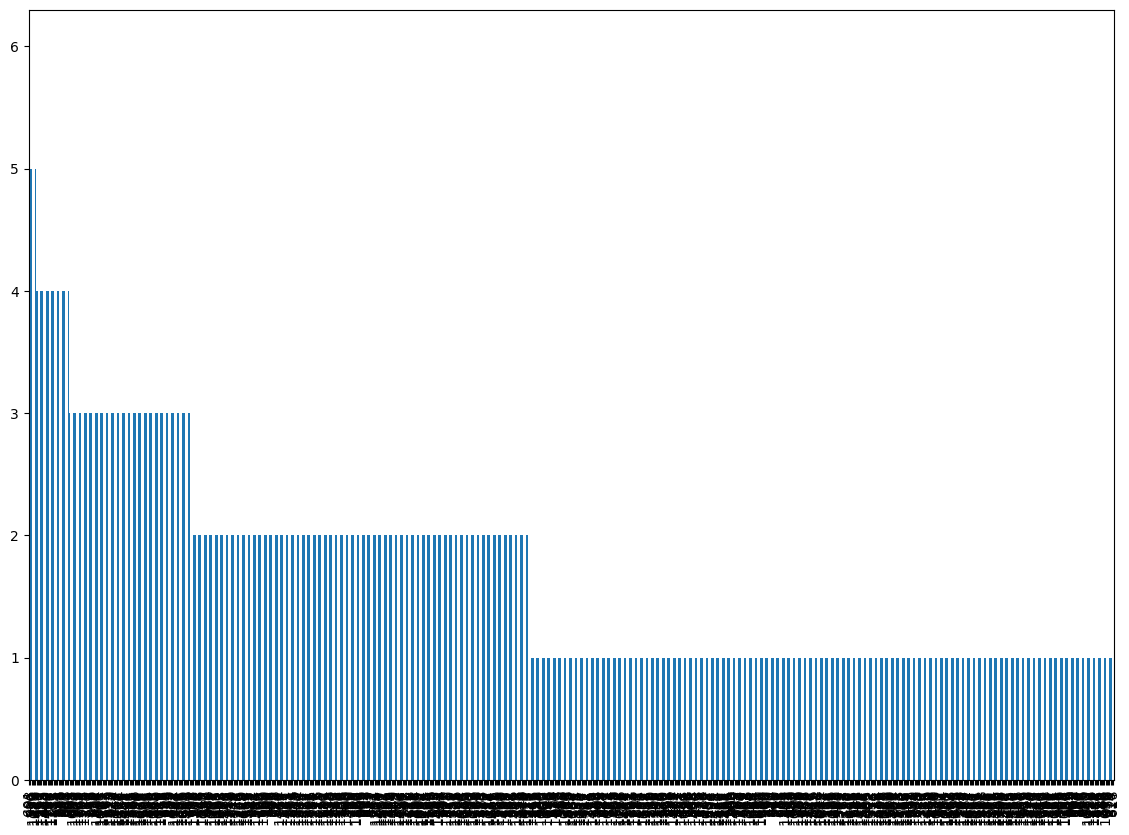

In [ ]:
#'Age' variable's value counts
plt.figure(figsize=(14,10))
wa["DailyRate"].value_counts().plot(kind="bar")
plt.show()

<Axes: ylabel='DailyRate'>

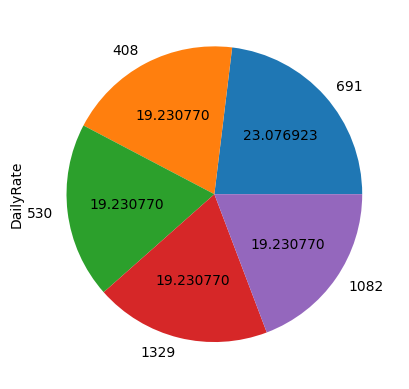

In [ ]:
wa["DailyRate"].value_counts()[:5].plot(kind="pie",autopct="%2f")

<Axes: xlabel='DailyRate', ylabel='Count'>

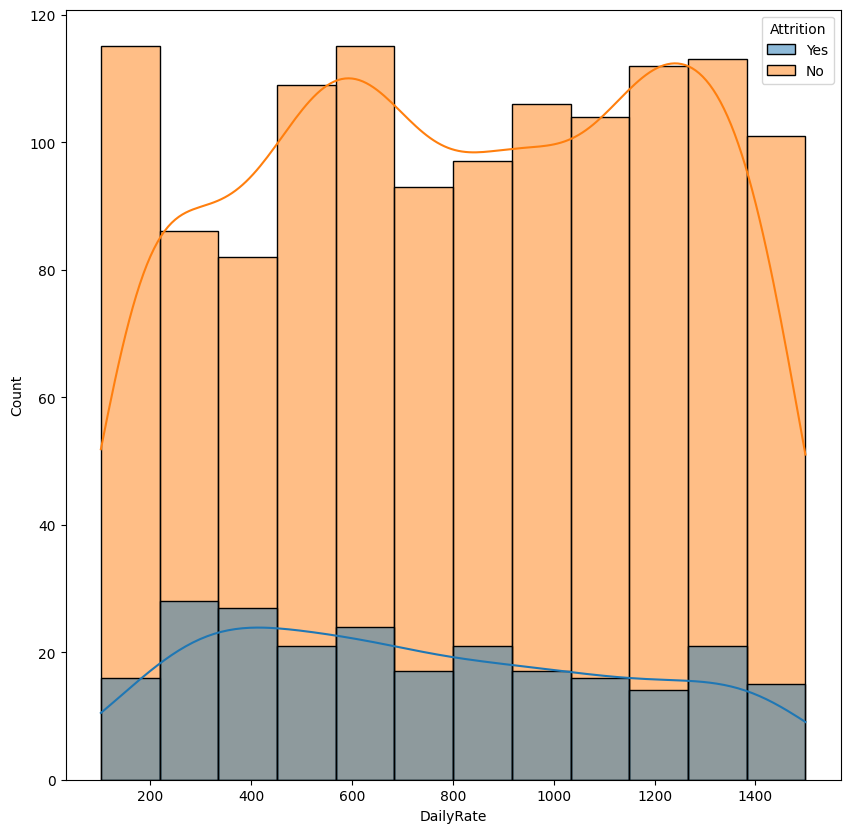

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(x='DailyRate',hue='Attrition',data=wa,kde=True)

(array([58., 44., 45., 41., 57., 42., 39., 56., 42., 60., 59., 50., 62.,
        41., 37., 52., 45., 50., 51., 43., 33., 60., 48., 54., 51., 47.,
        60., 58., 39., 46.]),
 array([ 102.        ,  148.56666667,  195.13333333,  241.7       ,
         288.26666667,  334.83333333,  381.4       ,  427.96666667,
         474.53333333,  521.1       ,  567.66666667,  614.23333333,
         660.8       ,  707.36666667,  753.93333333,  800.5       ,
         847.06666667,  893.63333333,  940.2       ,  986.76666667,
        1033.33333333, 1079.9       , 1126.46666667, 1173.03333333,
        1219.6       , 1266.16666667, 1312.73333333, 1359.3       ,
        1405.86666667, 1452.43333333, 1499.        ]),
 <BarContainer object of 30 artists>)

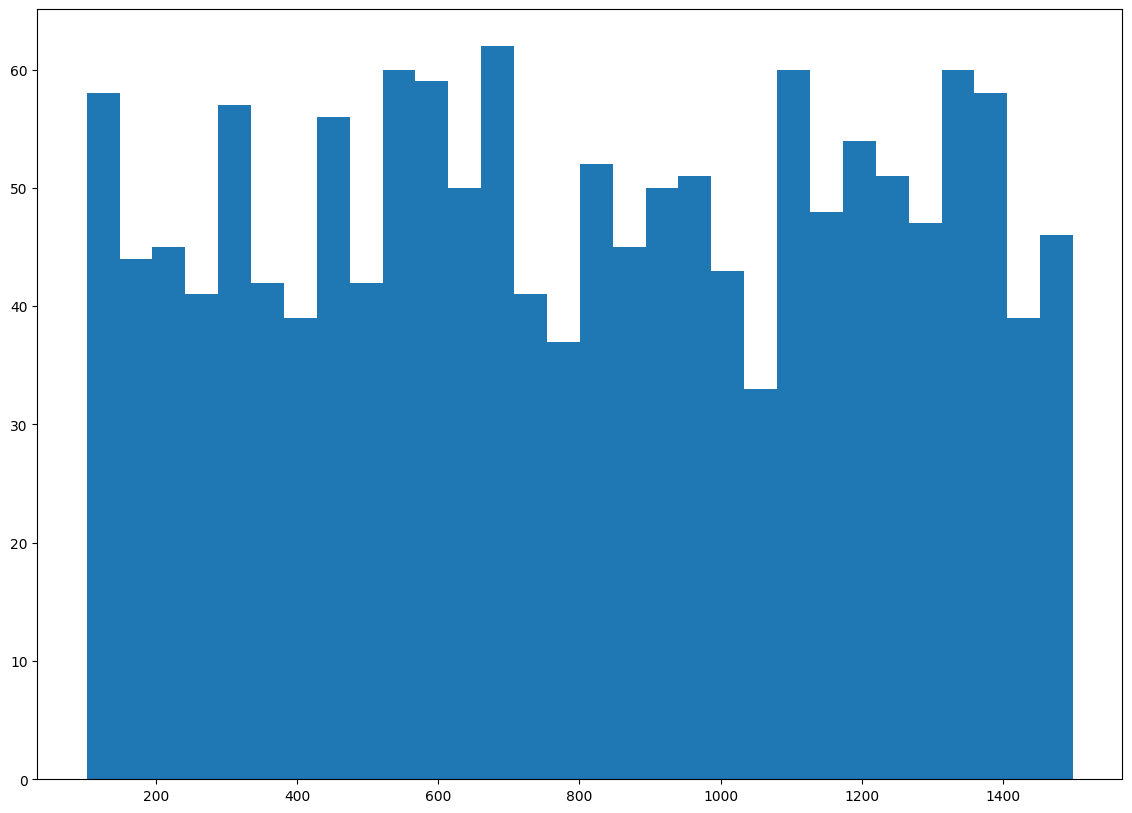

In [ ]:
#hist plot of the variable-BusinessTravel
plt.figure(figsize=(14,10))
plt.hist(wa["DailyRate"],bins=30)

# 'Department' Analysis

In [ ]:
wa.Department

0                        Sales
1       Research & Development
2       Research & Development
3       Research & Development
4       Research & Development
                 ...          
1465    Research & Development
1466    Research & Development
1467    Research & Development
1468                     Sales
1469    Research & Development
Name: Department, Length: 1470, dtype: object

In [ ]:
len(wa["Department"].unique())

3

In [ ]:
wa["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [ ]:
wa.groupby("Department").mean().T

Department,Human Resources,Research & Development,Sales
Age,37.81,37.04,36.54
DailyRate,751.54,806.85,800.28
DistanceFromHome,8.70,9.14,9.37
Education,2.97,2.90,2.93
EmployeeCount,1.00,1.00,1.00
EmployeeNumber,"1,205.27","1,006.50","1,038.95"
EnvironmentSatisfaction,2.68,2.74,2.68
HourlyRate,64.30,66.17,65.52
JobInvolvement,2.75,2.74,2.70
JobLevel,2.03,1.98,2.26


<Axes: xlabel='Attrition', ylabel='Department'>

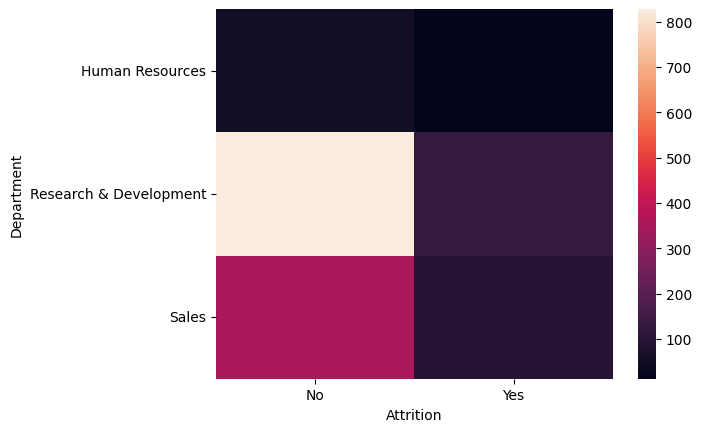

In [ ]:
sns.heatmap(pd.crosstab(wa["Department"],wa["Attrition"]))

# Education  Analysis

In [ ]:
wa.Education

0       2
1       1
2       2
3       4
4       1
       ..
1465    2
1466    1
1467    3
1468    3
1469    3
Name: Education, Length: 1470, dtype: int64

In [ ]:
len(wa["Education"].unique())

5

In [ ]:
wa["Education"].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [ ]:
wa.groupby("Education").mean().T

Education,1,2,3,4,5
Age,32.16,36.86,36.48,39.28,39.90
DailyRate,822.42,822.10,781.80,811.84,785.62
DistanceFromHome,8.74,9.21,9.24,9.15,10.50
EmployeeCount,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,979.04,985.42,"1,037.81","1,054.07","1,022.56"
EnvironmentSatisfaction,2.75,2.72,2.78,2.65,2.65
HourlyRate,65.04,66.22,65.64,66.07,68.44
JobInvolvement,2.64,2.72,2.75,2.73,2.83
JobLevel,1.79,2.04,2.07,2.13,2.52
JobSatisfaction,2.80,2.77,2.65,2.79,2.67


<Axes: xlabel='Attrition', ylabel='Education'>

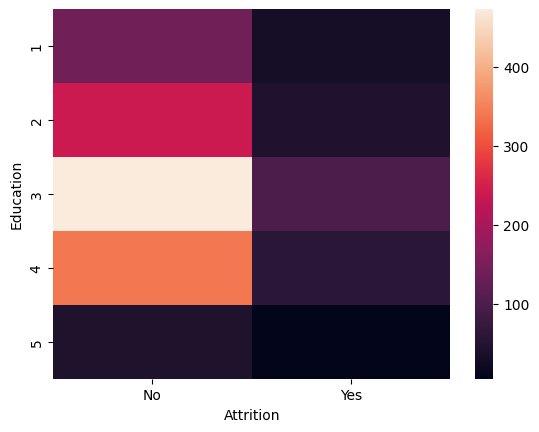

In [ ]:
# co relation with target variable
sns.heatmap(pd.crosstab(wa["Education"],wa["Attrition"]))

#The employee of Bachelor degree(3rd level education)wants to leave company than the people have any other degrees.High co relation of Attrition and education level of three showing this graph.

#'DistanceFromHome' Analysis

In [ ]:
wa.DistanceFromHome

0        1
1        8
2        2
3        3
4        2
        ..
1465    23
1466     6
1467     4
1468     2
1469     8
Name: DistanceFromHome, Length: 1470, dtype: int64

In [ ]:
len(wa["DistanceFromHome"].unique())

29

In [ ]:
wa["DistanceFromHome"].value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

In [ ]:
wa.groupby("DistanceFromHome").mean().T

DistanceFromHome,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
Age,37.05,38.50,35.92,36.78,34.62,37.56,37.85,36.66,36.21,35.08,...,37.48,35.56,36.58,37.56,37.04,37.28,38.88,35.33,40.48,37.56
DailyRate,820.27,765.16,820.87,829.91,881.66,791.00,803.68,760.50,759.21,771.64,...,955.36,736.17,723.89,798.78,750.57,747.44,744.80,799.50,944.87,725.44
Education,2.98,2.83,2.77,2.70,2.95,2.90,2.95,2.85,2.99,3.06,...,2.84,2.94,3.00,2.96,2.68,3.08,3.04,2.92,2.96,2.93
EmployeeCount,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,"1,006.55","1,035.73",910.85,"1,030.42",960.72,835.83,"1,025.23","1,010.55","1,038.80","1,138.26",...,"1,038.32",972.50,"1,151.79",805.04,"1,101.89",977.00,"1,058.92",966.33,"1,211.00","1,009.52"
EnvironmentSatisfaction,2.70,2.78,2.70,2.81,2.66,2.68,2.68,2.64,2.61,2.95,...,2.88,2.83,2.84,2.78,2.57,2.44,2.32,2.92,3.00,2.30
HourlyRate,66.70,66.09,63.56,65.09,66.25,61.46,60.27,67.01,67.48,65.84,...,67.20,54.00,71.37,64.44,61.57,72.44,68.84,71.75,67.61,69.30
JobInvolvement,2.65,2.70,2.77,2.66,2.82,2.64,2.87,2.79,2.72,2.74,...,2.92,3.00,2.53,2.70,2.71,2.52,2.76,2.92,2.70,2.48
JobLevel,2.05,2.12,2.05,2.22,2.00,2.00,2.17,2.05,1.82,2.07,...,1.96,1.67,2.21,2.07,1.93,2.20,2.60,1.92,2.39,2.07
JobSatisfaction,2.70,2.84,2.76,2.78,2.62,2.78,2.71,2.59,2.62,2.81,...,2.96,3.00,2.74,2.93,2.86,2.80,2.72,2.58,2.48,2.81


<Axes: xlabel='DistanceFromHome', ylabel='Count'>

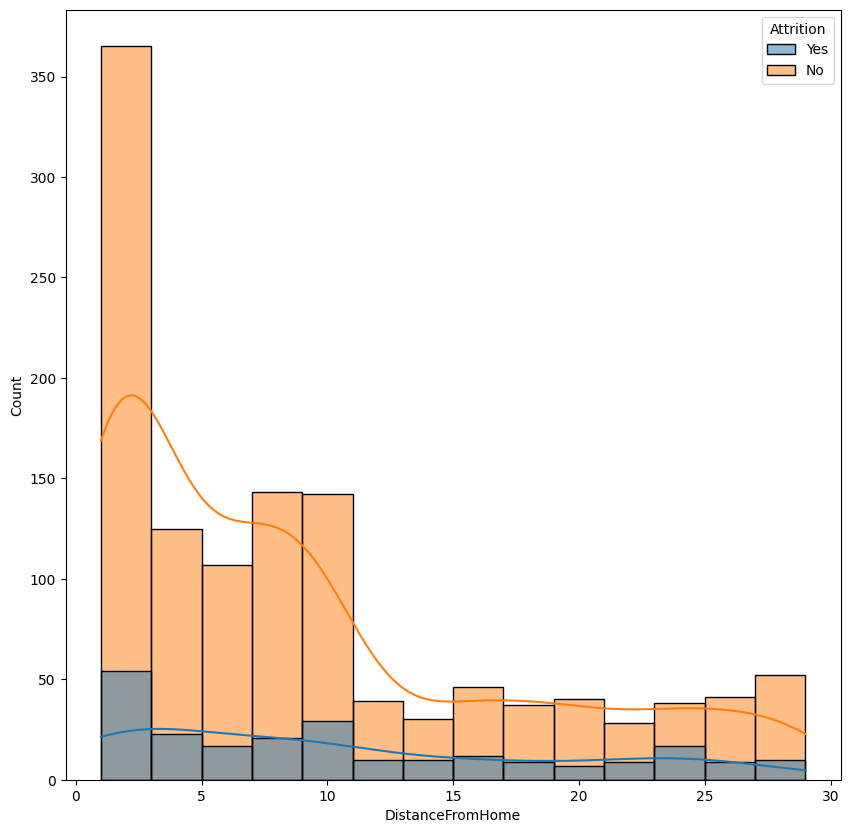

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(x='DistanceFromHome',hue='Attrition',data=wa,kde=True)

#'EducationField'Analysis

In [ ]:
wa.EducationField

0       Life Sciences
1       Life Sciences
2               Other
3       Life Sciences
4             Medical
            ...      
1465          Medical
1466          Medical
1467    Life Sciences
1468          Medical
1469          Medical
Name: EducationField, Length: 1470, dtype: object

In [ ]:
len(wa["EducationField"].unique())

6

In [ ]:
wa["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [ ]:
wa.groupby("EducationField").mean().T

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Age,37.04,37.11,37.92,36.84,35.37,36.12
DailyRate,675.26,804.43,727.84,822.80,796.02,842.13
DistanceFromHome,9.04,8.96,10.11,9.35,8.93,8.81
Education,3.11,2.93,3.13,2.80,3.07,2.83
EmployeeCount,1.00,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,"1,180.37","1,024.43",999.83,"1,017.17","1,050.70","1,036.24"
EnvironmentSatisfaction,2.67,2.69,2.72,2.69,3.01,2.82
HourlyRate,60.89,66.83,66.15,65.28,62.37,66.62
JobInvolvement,2.74,2.73,2.69,2.75,2.70,2.72
JobLevel,2.15,2.05,2.36,2.04,1.99,1.87


<Axes: xlabel='Attrition', ylabel='EducationField'>

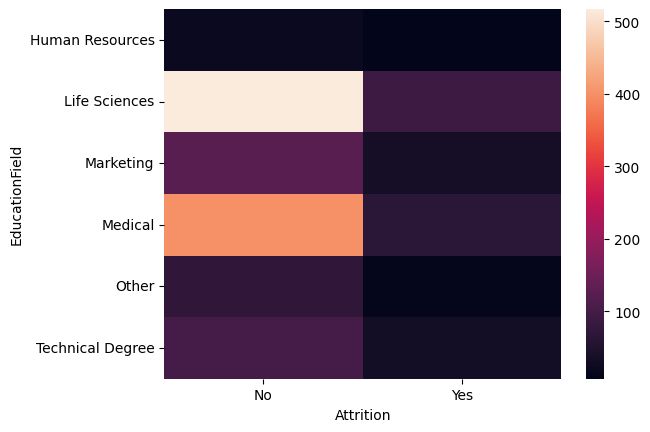

In [ ]:
# co relation with target variable
sns.heatmap(pd.crosstab(wa["EducationField"],wa["Attrition"]))

#Environment Satisfaction Analysis

In [ ]:
wa.EnvironmentSatisfaction

0       2
1       3
2       4
3       4
4       1
       ..
1465    3
1466    4
1467    2
1468    4
1469    2
Name: EnvironmentSatisfaction, Length: 1470, dtype: int64

In [ ]:
len(wa["EnvironmentSatisfaction"].unique())

4

In [ ]:
wa["EnvironmentSatisfaction"].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [ ]:
wa.groupby("EnvironmentSatisfaction").mean().T

EnvironmentSatisfaction,1,2,3,4
Age,37.11,36.51,36.77,37.23
DailyRate,794.89,791.63,804.26,812.50
DistanceFromHome,9.17,9.60,9.18,8.96
Education,2.99,2.90,2.89,2.90
EmployeeCount,1.00,1.00,1.00,1.00
EmployeeNumber,"1,032.88","1,012.67",987.64,"1,065.42"
HourlyRate,66.84,66.94,66.37,64.12
JobInvolvement,2.72,2.77,2.72,2.72
JobLevel,2.10,2.02,2.06,2.08
JobSatisfaction,2.76,2.72,2.71,2.73


<Axes: xlabel='EnvironmentSatisfaction', ylabel='Count'>

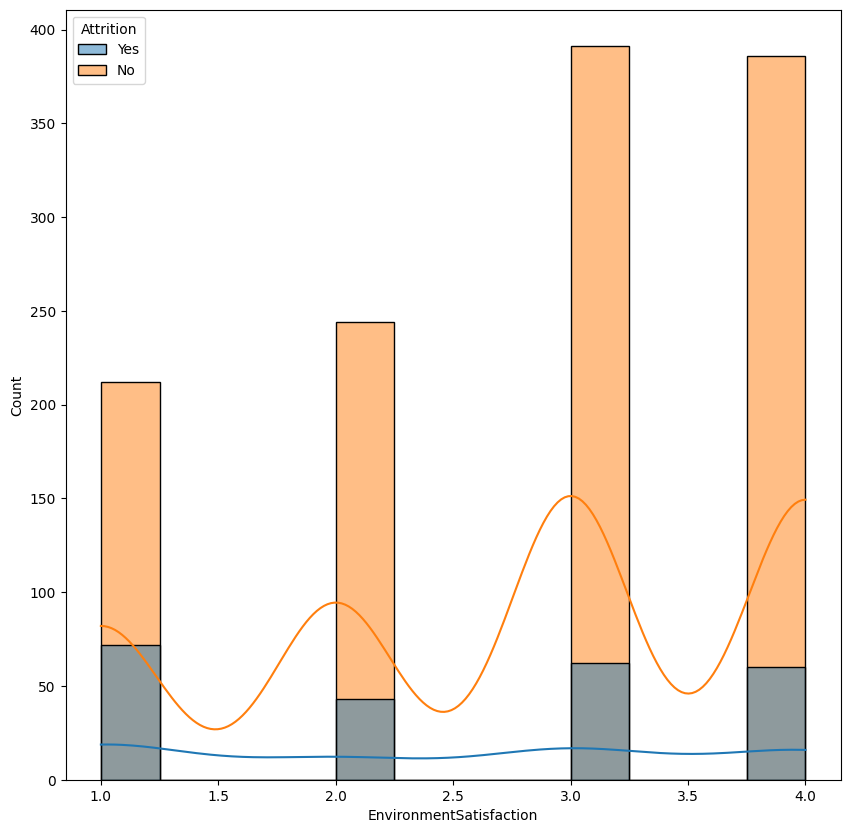

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(x='EnvironmentSatisfaction',hue='Attrition',data=wa,kde=True)

#PerformanceRating Analysis

In [ ]:
wa.PerformanceRating

0       3
1       4
2       3
3       3
4       3
       ..
1465    3
1466    3
1467    4
1468    3
1469    3
Name: PerformanceRating, Length: 1470, dtype: int64

In [ ]:
len(wa["PerformanceRating"].unique())

2

In [ ]:
wa["PerformanceRating"].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [ ]:
wa.groupby("PerformanceRating").mean().T

PerformanceRating,3,4
Age,36.92,36.96
DailyRate,802.40,802.93
DistanceFromHome,9.10,9.71
Education,2.92,2.85
EmployeeCount,1.00,1.00
EmployeeNumber,"1,030.09",996.12
EnvironmentSatisfaction,2.74,2.65
HourlyRate,65.91,65.79
JobInvolvement,2.74,2.68
JobLevel,2.07,2.01


<Axes: xlabel='PerformanceRating', ylabel='Count'>

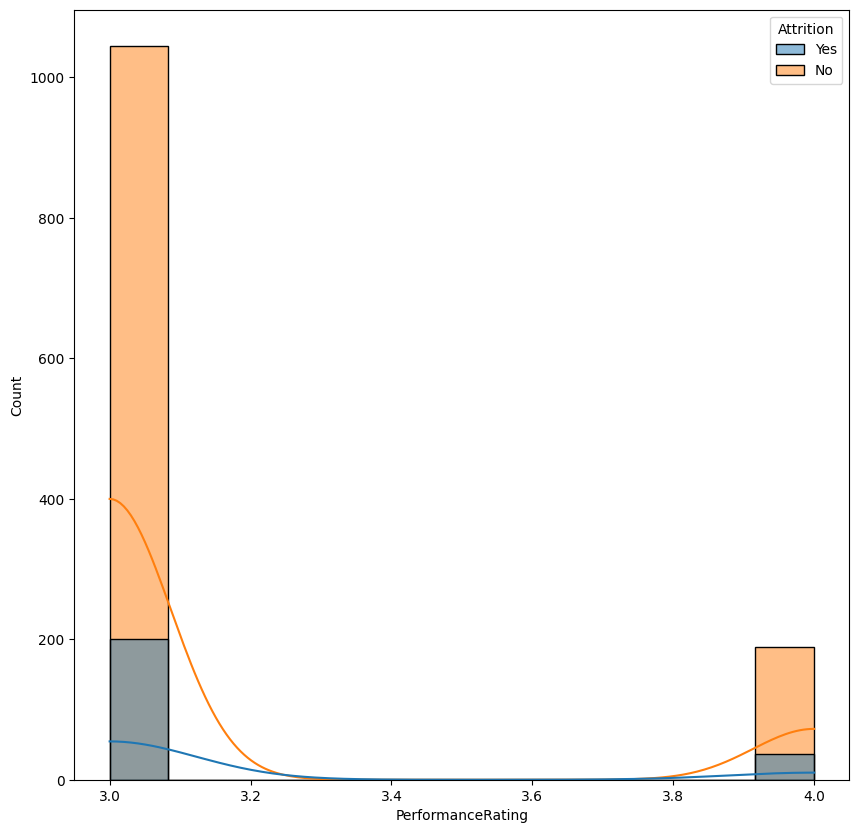

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(x='PerformanceRating',hue='Attrition',data=wa,kde=True)

#YearsAtCompany analysis

In [ ]:
len(wa["YearsAtCompany"].unique())

37

In [ ]:
wa["YearsAtCompany"].value_counts()

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
27      2
36      2
29      2
23      2
37      1
40      1
34      1
30      1
Name: YearsAtCompany, dtype: int64

In [ ]:
wa.groupby("YearsAtCompany").mean().T

YearsAtCompany,0,1,2,3,4,5,6,7,8,9,...,27,29,30,31,32,33,34,36,37,40
Age,31.23,35.06,34.71,35.12,36.57,36.86,35.45,35.99,36.99,39.05,...,50.00,55.50,50.00,52.33,50.67,52.60,52.00,55.00,58.00,58.00
DailyRate,770.66,781.34,810.54,821.42,814.91,822.44,825.59,823.53,814.26,747.76,...,"1,044.00",329.50,"1,234.00",804.00,615.00,604.80,621.00,568.50,682.00,147.00
DistanceFromHome,8.48,9.43,8.87,8.05,9.06,9.52,8.99,9.13,9.30,9.76,...,18.00,8.00,20.00,7.33,9.00,3.60,3.00,13.50,10.00,23.00
Education,2.84,2.85,2.83,2.98,2.72,2.88,2.80,2.94,3.04,2.96,...,3.00,3.00,5.00,4.00,3.00,3.40,4.00,4.00,4.00,4.00
EmployeeCount,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,991.41,966.25,"1,043.83",997.12,"1,082.51","1,054.10","1,022.45","1,034.67",970.75,"1,032.96",...,324.50,915.50,"1,606.00",789.33,"1,073.67",958.00,776.00,976.00,131.00,165.00
EnvironmentSatisfaction,2.80,2.69,2.65,2.62,2.71,2.75,2.75,2.98,2.76,2.80,...,2.00,2.50,2.00,3.00,1.67,2.80,3.00,3.50,4.00,4.00
HourlyRate,68.89,67.35,64.06,65.69,66.31,67.16,68.21,65.86,64.12,63.82,...,65.50,62.00,41.00,62.33,81.33,68.60,31.00,70.50,37.00,94.00
JobInvolvement,2.70,2.62,2.70,2.80,2.70,2.77,2.79,2.71,2.91,2.77,...,2.00,3.00,3.00,2.67,1.67,2.20,2.00,2.50,3.00,3.00
JobLevel,1.52,1.61,1.61,1.68,1.74,1.82,1.76,2.10,2.12,2.34,...,4.50,5.00,4.00,4.67,4.67,4.20,4.00,5.00,4.00,3.00


<Axes: xlabel='YearsAtCompany', ylabel='Count'>

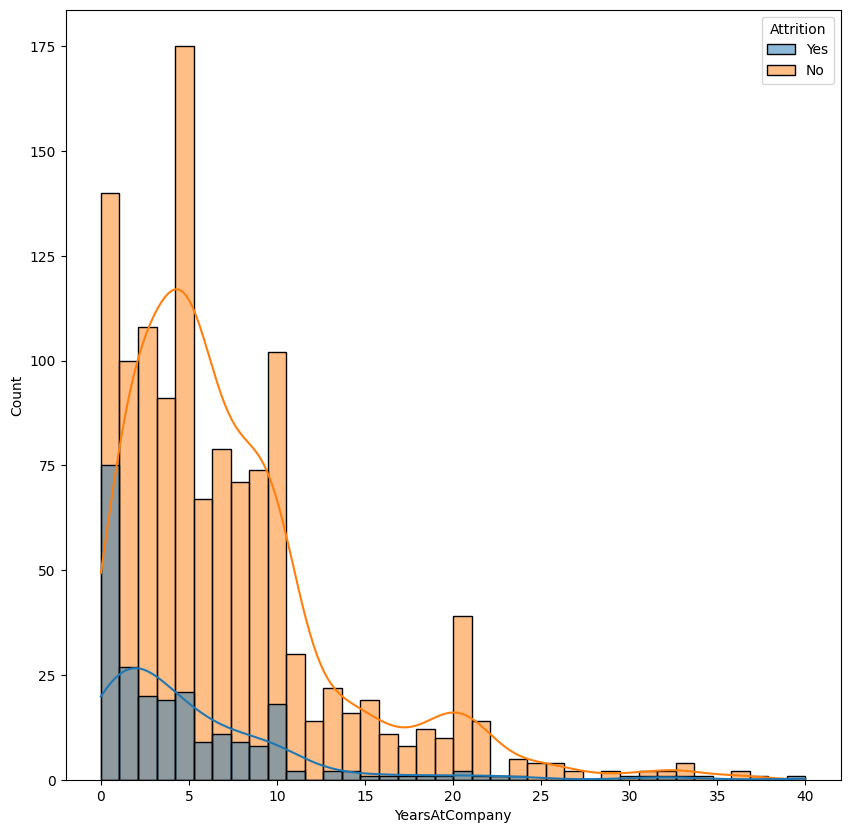

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(x='YearsAtCompany',hue='Attrition',data=wa,kde=True)

#YearsSinceLastPromotion Analysis

In [ ]:
wa.YearsSinceLastPromotion

0       0
1       1
2       0
3       3
4       2
       ..
1465    0
1466    1
1467    0
1468    0
1469    1
Name: YearsSinceLastPromotion, Length: 1470, dtype: int64

In [ ]:
len(wa["YearsSinceLastPromotion"].unique())

16

In [ ]:
wa["YearsSinceLastPromotion"].value_counts()

0     581
1     357
2     159
7      76
4      61
3      52
5      45
6      32
11     24
8      18
9      17
15     13
13     10
12     10
14      9
10      6
Name: YearsSinceLastPromotion, dtype: int64

In [ ]:
wa.groupby("YearsSinceLastPromotion").mean().T

YearsSinceLastPromotion,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Age,35.64,36.19,36.59,37.94,40.77,37.53,37.84,38.75,36.78,40.24,37.00,41.62,44.90,46.80,46.33,48.15
DailyRate,820.53,792.10,803.50,792.35,832.66,761.73,731.19,806.14,820.61,652.35,895.50,651.12,"1,048.50",601.30,816.89,826.08
DistanceFromHome,9.06,9.52,8.38,9.23,10.92,7.80,9.44,9.58,8.56,9.76,14.17,6.38,10.20,11.50,8.11,10.85
Education,2.91,2.84,2.95,2.60,2.90,3.04,3.00,3.12,3.00,2.88,3.67,3.00,3.50,2.90,2.78,3.15
EmployeeCount,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
EmployeeNumber,"1,007.44","1,056.58","1,046.05","1,025.62",933.10,"1,076.29","1,132.62","1,033.45","1,095.83",902.88,694.33,876.29,"1,040.40","1,032.40","1,470.22",769.62
EnvironmentSatisfaction,2.67,2.78,2.70,2.83,2.67,2.84,2.62,2.74,3.11,2.82,2.33,2.54,2.70,3.30,2.44,2.77
HourlyRate,67.11,66.48,62.02,63.56,67.08,64.71,63.72,65.91,58.00,59.29,69.00,71.67,67.20,52.80,74.22,66.54
JobInvolvement,2.73,2.73,2.75,2.60,2.75,2.78,2.75,2.83,2.78,2.59,2.67,2.54,2.60,2.50,2.56,2.69
JobLevel,1.83,1.93,1.86,2.25,2.79,2.22,2.56,2.24,2.44,2.82,2.50,3.46,3.60,3.80,3.89,3.77


<Axes: xlabel='YearsSinceLastPromotion', ylabel='Count'>

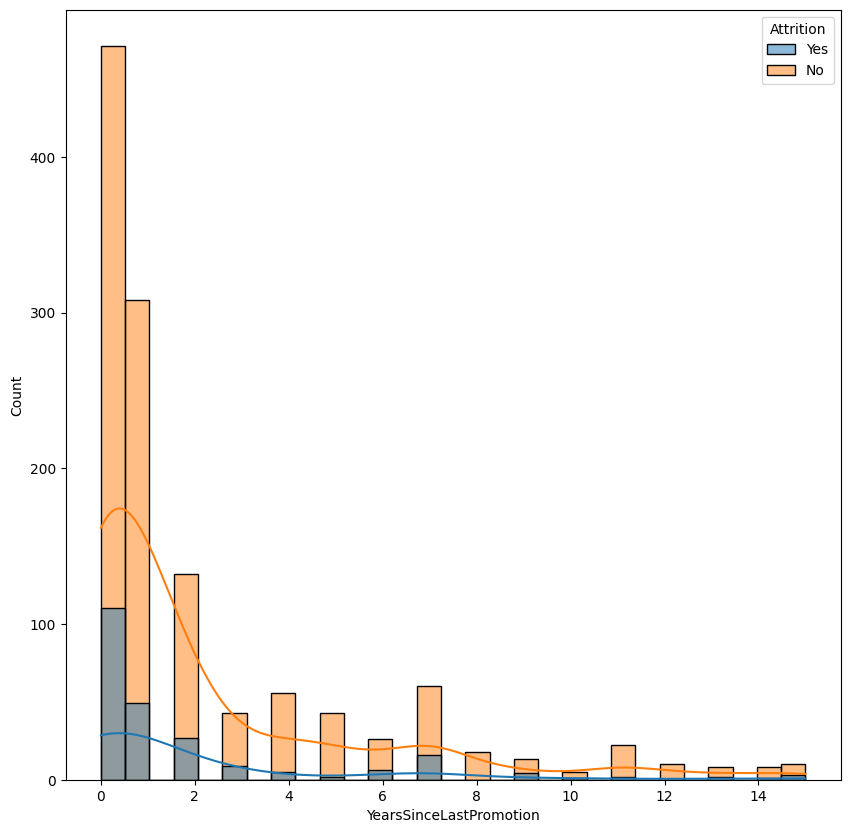

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(x='YearsSinceLastPromotion',hue='Attrition',data=wa,kde=True)

#the education field Life Sciences had the highest precentage of attrition, followed by Medical and Marketing.

<Axes: xlabel='EducationField', ylabel='Count'>

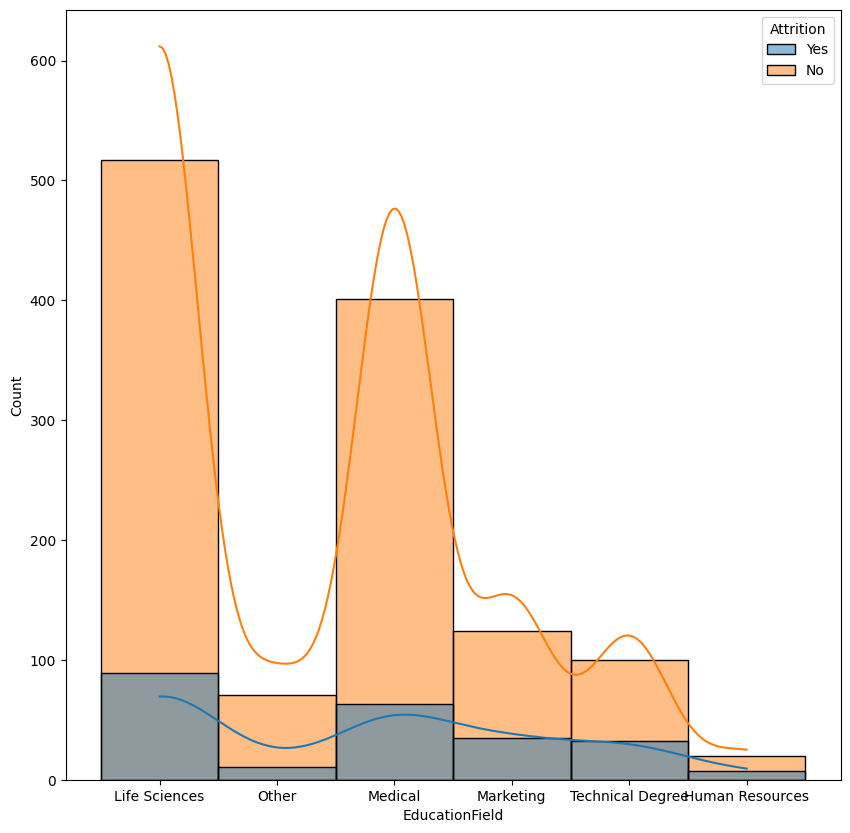

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(x='EducationField',hue='Attrition',data=wa,kde=True)

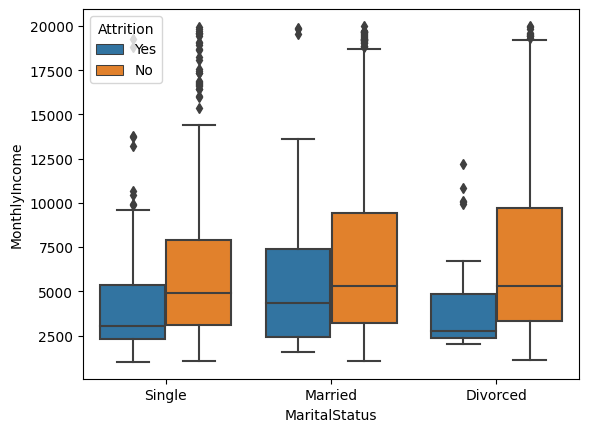

In [ ]:
sns.boxplot(x=wa['MaritalStatus'],y=wa['MonthlyIncome'],hue=wa['Attrition'])
plt.show()

#comparing to monthly income,single have less monthly income thats why they want's to leave company.

#EmployeeCountAnalysis

In [ ]:
wa.EmployeeCount

0       1
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: EmployeeCount, Length: 1470, dtype: int64

In [ ]:
len(wa["EmployeeCount"].unique())

1

In [ ]:
wa["EmployeeCount"].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

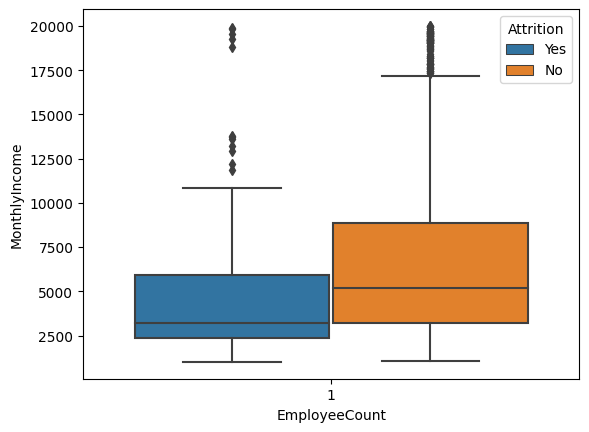

In [ ]:
sns.boxplot(x=wa['EmployeeCount'],y=wa['MonthlyIncome'],hue=wa['Attrition'])
plt.show()

#monthly income have more impacts on employee count and attrition.

#StandardHours  Analysis

In [ ]:
wa.StandardHours

0       80
1       80
2       80
3       80
4       80
        ..
1465    80
1466    80
1467    80
1468    80
1469    80
Name: StandardHours, Length: 1470, dtype: int64

In [ ]:
len(wa["StandardHours"].unique())

1

In [ ]:
wa["StandardHours"].value_counts()

80    1470
Name: StandardHours, dtype: int64

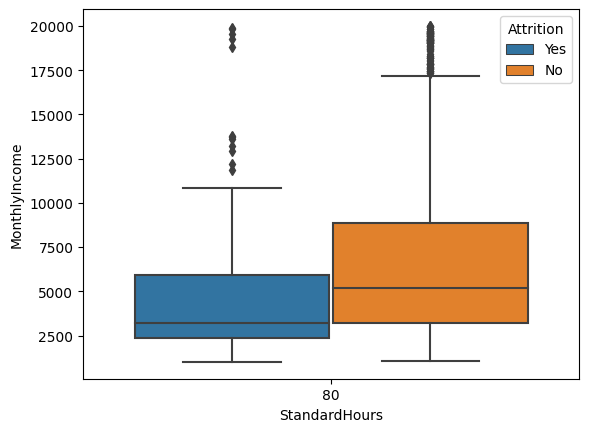

In [ ]:
sns.boxplot(x=wa['StandardHours'],y=wa['MonthlyIncome'],hue=wa['Attrition'])
plt.show()

#Attrition is not so impacted by standardhours.

#Employees with 1 year experience has the highest percentage to leave the company

# As the level of education increases , average monthly income increases

#  YearsWithCurrManager Analysis

In [ ]:
wa.YearsWithCurrManager

0       5
1       7
2       0
3       0
4       2
       ..
1465    3
1466    7
1467    3
1468    8
1469    2
Name: YearsWithCurrManager, Length: 1470, dtype: int64

In [ ]:
len(wa["YearsWithCurrManager"].unique())

18

In [ ]:
wa["YearsWithCurrManager"].value_counts()

2     344
0     263
7     216
3     142
8     107
4      98
1      76
9      64
5      31
6      29
10     27
11     22
12     18
13     14
17      7
15      5
14      5
16      2
Name: YearsWithCurrManager, dtype: int64

<ipython-input-820-973ec3516400>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(wa["YearsWithCurrManager"])


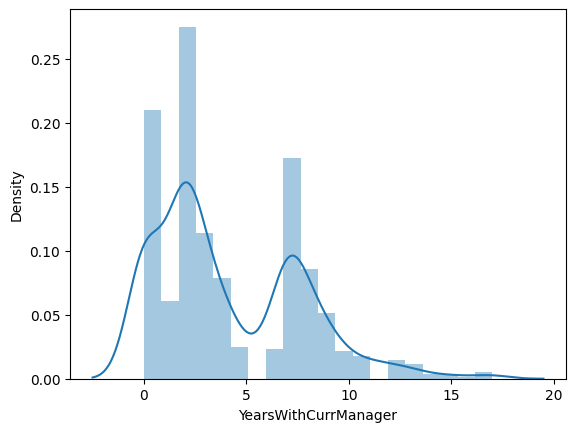

In [ ]:
sns.distplot(wa["YearsWithCurrManager"])
plt.show()

#more employees are going to leave with less than 2 years with the current managers

#Impacts on target column of other columns by visualization

<Axes: xlabel='YearsWithCurrManager', ylabel='Count'>

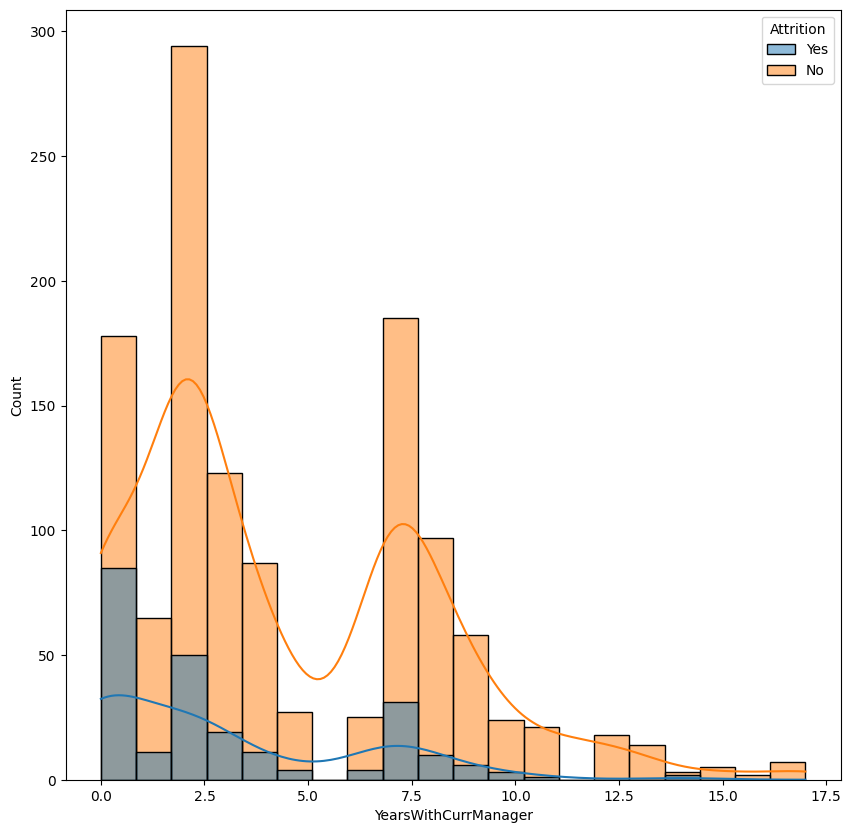

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(x='YearsWithCurrManager',hue='Attrition',data=wa,kde=True)

# Data preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in wa.columns:
  if wa[column].dtypes==np.number:
    continue
  else:
    wa[column]=LabelEncoder().fit_transform(wa[column])

<ipython-input-822-e348e80c4a47>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if wa[column].dtypes==np.number:
<ipython-input-822-e348e80c4a47>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if wa[column].dtypes==np.number:
<ipython-input-822-e348e80c4a47>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if wa[column].dtypes==np.number:
<ipython-input-822-e348e80c4a47>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if wa[column].dtypes==np.number:
<ipython-input-822-e348e80c4a47>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is depre

In [ ]:
wa.dtypes

Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

# Feature Scaling

#  Scaling the data using Standard Scaler

In [ ]:
from sklearn. preprocessing import StandardScaler
Scaler=StandardScaler()
columns_to_scale=['Age','BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
wa[columns_to_scale]=Scaler.fit_transform(wa[columns_to_scale])

In [ ]:
wa.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.45,1,0.59,0.71,1.40,-1.01,-0.89,-0.94,0.00,-1.73,...,-1.58,0.00,-0.93,-0.42,-2.17,-2.49,-0.16,-0.06,-0.68,0.25
1,1.32,0,-0.91,-1.30,-0.49,-0.15,-1.87,-0.94,0.00,-1.73,...,1.19,0.00,0.24,-0.16,0.16,0.34,0.50,0.76,-0.37,0.81
2,0.01,1,0.59,1.43,-0.49,-0.89,-0.89,1.32,0.00,-1.73,...,-0.66,0.00,-0.93,-0.55,0.16,0.34,-1.16,-1.17,-0.68,-1.16
3,-0.43,0,-0.91,1.49,-0.49,-0.76,1.06,-0.94,0.00,-1.72,...,0.27,0.00,-0.93,-0.42,0.16,0.34,0.17,0.76,0.25,-1.16
4,-1.09,0,0.59,-0.52,-0.49,-0.89,-1.87,0.57,0.00,-1.72,...,1.19,0.00,0.24,-0.68,0.16,0.34,-0.82,-0.62,-0.06,-0.60


In [ ]:
wa["Attrition"]=wa["Attrition"].replace({"Attrtion Accepted":1,"Attrition Rejected":0})

# Feature selection-
#drop useless column

In [ ]:
wa.drop(['Over18'],inplace=True,axis=1)
wa.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.45,1,0.59,0.71,1.40,-1.01,-0.89,-0.94,0.00,-1.73,...,-1.58,0.00,-0.93,-0.42,-2.17,-2.49,-0.16,-0.06,-0.68,0.25
1,1.32,0,-0.91,-1.30,-0.49,-0.15,-1.87,-0.94,0.00,-1.73,...,1.19,0.00,0.24,-0.16,0.16,0.34,0.50,0.76,-0.37,0.81


#  Define X and y

In [ ]:
#X are our indepedent features and y is our target feature.
X=wa.drop(["Attrition"],axis=1)
y=wa["Attrition"]

In [ ]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.45,0.59,0.71,1.40,-1.01,-0.89,-0.94,0.00,-1.73,-0.66,...,-1.58,0.00,-0.93,-0.42,-2.17,-2.49,-0.16,-0.06,-0.68,0.25
1,1.32,-0.91,-1.30,-0.49,-0.15,-1.87,-0.94,0.00,-1.73,0.25,...,1.19,0.00,0.24,-0.16,0.16,0.34,0.50,0.76,-0.37,0.81
2,0.01,0.59,1.43,-0.49,-0.89,-0.89,1.32,0.00,-1.73,1.17,...,-0.66,0.00,-0.93,-0.55,0.16,0.34,-1.16,-1.17,-0.68,-1.16
3,-0.43,-0.91,1.49,-0.49,-0.76,1.06,-0.94,0.00,-1.72,1.17,...,0.27,0.00,-0.93,-0.42,0.16,0.34,0.17,0.76,0.25,-1.16
4,-1.09,0.59,-0.52,-0.49,-0.89,-1.87,0.57,0.00,-1.72,-1.58,...,1.19,0.00,0.24,-0.68,0.16,0.34,-0.82,-0.62,-0.06,-0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.10,-0.91,0.20,-0.49,1.70,-0.89,0.57,0.00,1.72,0.25,...,0.27,0.00,0.24,0.74,0.16,0.34,-0.33,-0.62,-0.68,-0.31
1466,0.23,0.59,-0.46,-0.49,-0.39,-1.87,0.57,0.00,1.72,1.17,...,-1.58,0.00,0.24,-0.29,1.71,0.34,0.00,0.76,-0.37,0.81
1467,-1.09,0.59,-1.59,-0.49,-0.64,0.09,-0.94,0.00,1.73,-0.66,...,-0.66,0.00,0.24,-0.68,-2.17,0.34,-0.16,-0.62,-0.68,-0.31
1468,1.32,-0.91,0.54,1.40,-0.89,0.09,0.57,0.00,1.73,1.17,...,1.19,0.00,-0.93,0.74,0.16,-1.08,0.33,0.49,-0.68,1.09


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

##Train Test Split Ratio-80:20

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [ ]:
X_test.shape

(294, 33)

In [ ]:
y_test.shape

(294,)

In [ ]:
X_train.shape

(1176, 33)

In [ ]:
y_train.shape

(1176,)

In [ ]:
X_train

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1194,1.10,0.59,1.03,1.40,-0.89,1.06,-0.94,0.00,1.08,-0.66,...,0.27,0.00,2.59,2.28,-0.62,0.34,-0.66,-0.62,-0.37,-0.60
128,-1.63,0.59,-0.51,-0.49,-0.89,-1.87,2.07,0.00,-1.43,0.25,...,0.27,0.00,0.24,-1.06,-0.62,0.34,-0.82,-0.89,-0.06,-0.88
810,0.99,0.59,-1.00,1.40,-0.76,-1.87,-0.19,0.00,0.18,-1.58,...,1.19,0.00,0.24,1.51,0.16,0.34,0.83,1.32,0.56,1.37
478,-1.31,0.59,-0.43,1.40,0.47,-1.87,0.57,0.00,-0.60,-0.66,...,0.27,0.00,-0.93,-0.55,-1.40,0.34,0.00,-0.06,-0.68,0.53
491,0.67,-0.91,0.50,-0.49,-0.02,2.04,0.57,0.00,-0.57,1.17,...,-0.66,0.00,0.24,-0.16,0.16,0.34,0.17,0.76,0.56,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,-1.52,0.59,-0.96,1.40,-0.27,0.09,-0.94,0.00,1.13,0.25,...,-0.66,0.00,0.24,-1.06,-0.62,0.34,-0.66,-0.62,-0.68,-0.60
963,0.12,0.59,0.51,1.40,-0.89,-0.89,-0.94,0.00,0.54,-0.66,...,1.19,0.00,0.24,-0.04,0.16,0.34,0.00,0.76,-0.37,0.81
734,-1.63,0.59,-1.44,-0.49,-0.15,-1.87,-0.94,0.00,-0.00,-0.66,...,-1.58,0.00,0.24,-0.94,0.16,-1.08,-0.49,-0.34,-0.37,-0.88
1315,-0.10,0.59,-0.95,-0.49,-0.89,1.06,1.32,0.00,1.37,1.17,...,1.19,0.00,0.24,0.48,-0.62,0.34,-0.99,-1.17,-0.68,-1.16


#  Modeling

#Logistic Regession

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
model.intercept_

array([-2.45373061])

In [ ]:
model.coef_

array([[-0.37319483, -0.01103789, -0.18295084,  0.56770589,  0.33313304,
         0.04186767, -0.05160038,  0.        ,  0.03415981, -0.46482253,
         0.13990054, -0.04604727, -0.3726356 ,  0.42261494, -0.32619154,
        -0.36598932,  0.28299348, -0.82285349,  0.01953103,  0.49985518,
         0.79462667, -0.17577771,  0.13117079, -0.28795124,  0.        ,
        -0.29386277, -0.46574626, -0.14709002, -0.24291559,  0.13530516,
        -0.25692751,  0.46486247, -0.3784397 ]])

In [ ]:
model.score(X_train,y_train)

0.8818027210884354

In [ ]:
model.score(X_test,y_test)

0.8741496598639455

In [ ]:
pred_model = model.predict(X_test)

In [ ]:
print(pred_model)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [ ]:
print(classification_report(y_test,pred_model))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.69      0.38      0.49        47

    accuracy                           0.87       294
   macro avg       0.79      0.68      0.71       294
weighted avg       0.86      0.87      0.86       294



In [ ]:
accuracy_score(y_test,pred_model)

0.8741496598639455

In [ ]:
mean_squared_error(y_test,pred_model)

0.12585034013605442

In [ ]:
roc_auc_score(y_test,pred_model)

0.675295029718322

In [ ]:
r2_score(y_test,pred_model)

0.0629683865966062

#Predicting model

In [ ]:
#See the output inconfusion matrix
cm_model=confusion_matrix(y_test,pred_model)
cm_model

array([[239,   8],
       [ 29,  18]])

Text(158.22222222222223, 0.5, 'Truth or Actual Values')

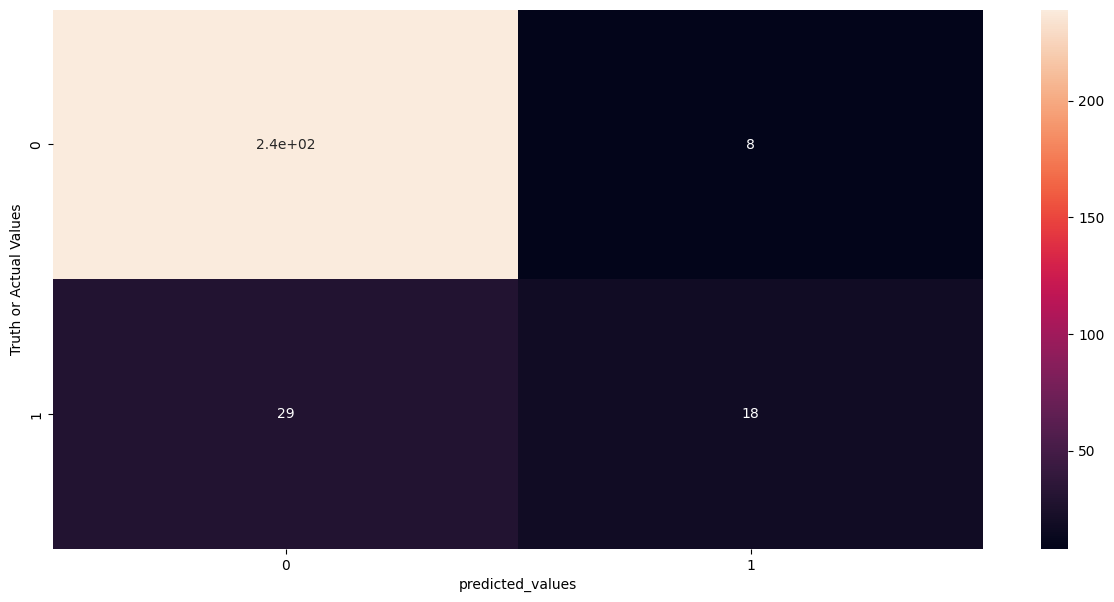

In [ ]:
#Plot the confusion matrix
plt.figure(figsize=(15,7))
sns.heatmap(cm_model,annot=True)
plt.xlabel("predicted_values")
plt.ylabel("Truth or Actual Values")

In [ ]:
print("logistic regression confusion matrix")
pd.DataFrame(confusion_matrix(y_test,pred_model))

logistic regression confusion matrix


,0,1
0,239,8
1,29,18


In [ ]:
cm_df = pd.DataFrame(cm_model, columns = ['Pred Positive','Pred Negative'], index = ['Actual P', 'Actual N'])

In [ ]:
cm_df.head()

,Pred Positive,Pred Negative
Actual P,239,8
Actual N,29,18


In [ ]:
(247+14)/(247+25+8+14)

0.8877551020408163

#Cross-Validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
val_score=cross_val_score(model,X_train,y_train.ravel(),cv=25)

In [ ]:
val_score

array([0.8125    , 0.82978723, 0.78723404, 0.87234043, 0.93617021,
       0.87234043, 0.87234043, 0.89361702, 0.91489362, 0.85106383,
       0.89361702, 0.89361702, 0.89361702, 0.85106383, 0.87234043,
       0.85106383, 0.89361702, 0.91489362, 0.78723404, 0.85106383,
       0.89361702, 0.91489362, 0.93617021, 0.82978723, 0.85106383])

In [ ]:
val_score.mean()

0.8707978723404254

In [ ]:
val_score.std()

0.04009467067539753

#Hyperparameter tunning
#GridSearchcv on logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [ ]:
clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [ ]:
best_logi_regressiongridsearchcv = clf.fit(X_train,y_train)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2160 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

In [ ]:
best_logi_regressiongridsearchcv .best_estimator_

LogisticRegression(C=0.004832930238571752, solver='liblinear')

In [ ]:
print (f'Accuracy - : {best_logi_regressiongridsearchcv .score(X_train,y_train):.3f}')

Accuracy - : 0.873


In [ ]:
print (f'Accuracy - : {best_logi_regressiongridsearchcv .score(X_test,y_test):.3f}')

Accuracy - : 0.878


#Randomforest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_model=RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train,y_train.ravel())

RandomForestClassifier(random_state=42)

In [ ]:
predict_train_data=random_forest_model.predict(X_test)

In [ ]:
random=random_forest_model.predict(X_train)
training_data_accuracy=accuracy_score(random,y_train)

In [ ]:
print("Accuracy score of randomforest data the training data:", training_data_accuracy )

Accuracy score of randomforest data the training data: 1.0


In [ ]:
random=random_forest_model.predict(X_test)
testing_data_accuracy=accuracy_score(random,y_test)

In [ ]:
print("Accuracy score of randomforest data the testing data:", testing_data_accuracy )

Accuracy score of randomforest data the testing data: 0.8299319727891157


##confusion matrix

In [ ]:
pred=random_forest_model.predict(X_test)

In [ ]:
pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
cm = confusion_matrix(y_test,pred)

In [ ]:
tn, fp, fn , tp = confusion_matrix(y_test,pred).ravel()

In [ ]:
tn

237

In [ ]:
fp

10

In [ ]:
fn

40

In [ ]:
tp

7

In [ ]:
cm

array([[237,  10],
       [ 40,   7]])

In [ ]:
cm_df = pd.DataFrame(cm, columns = ['Pred Positive','Pred Negative'], index = ['Actual P', 'Actual N'])

In [ ]:
cm_df.head()

,Pred Positive,Pred Negative
Actual P,237,10
Actual N,40,7


In [ ]:
(237+7)/(237+40+10+7)

0.8299319727891157

Text(158.22222222222223, 0.5, 'Truth or Actual Values')

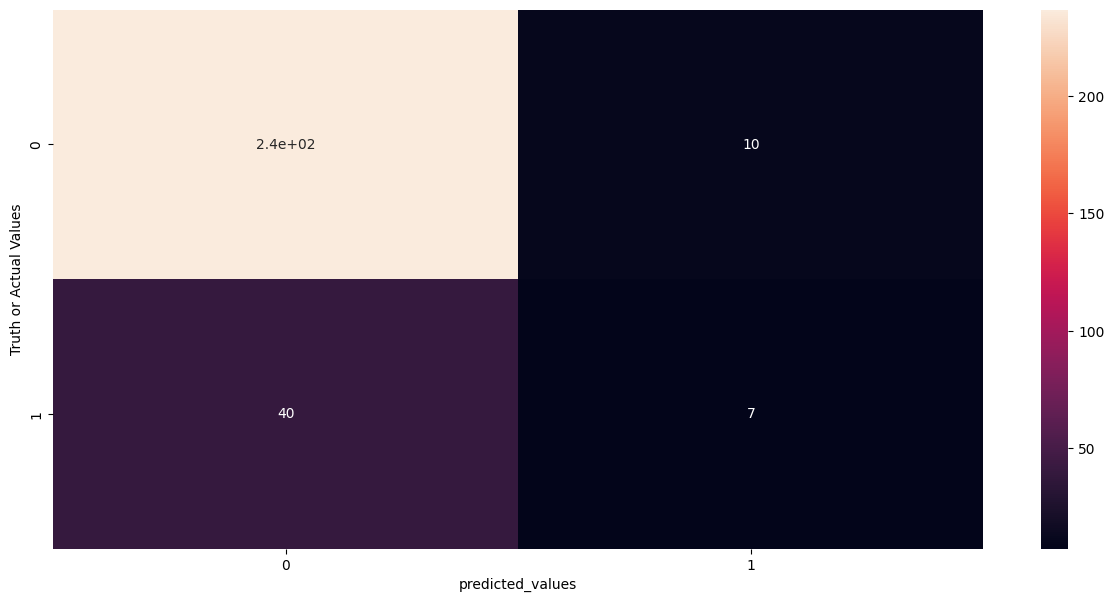

In [ ]:
#Plot the confusion matrix
plt.figure(figsize=(15,7))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted_values")
plt.ylabel("Truth or Actual Values")

In [ ]:
print("logistic regression confusion matrix")
pd.DataFrame(confusion_matrix(y_test,pred))

logistic regression confusion matrix


,0,1
0,237,10
1,40,7


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90       247
           1       0.41      0.15      0.22        47

    accuracy                           0.83       294
   macro avg       0.63      0.55      0.56       294
weighted avg       0.78      0.83      0.79       294



#cross validation on random forest classifier

In [ ]:
val_score=cross_val_score(random_forest_model,X_train,y_train.ravel(),cv=18)

In [ ]:
val_score

array([0.83333333, 0.83333333, 0.89393939, 0.84848485, 0.83333333,
       0.87878788, 0.89230769, 0.87692308, 0.89230769, 0.86153846,
       0.86153846, 0.87692308, 0.90769231, 0.83076923, 0.84615385,
       0.84615385, 0.84615385, 0.83076923])

In [ ]:
val_score.mean()

0.8605801605801607

In [ ]:
val_score.std()

0.024707633754848333

#Hyperparameter tunning

#Gridsearch cv on random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier


model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    }
}

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.85,{'n_estimators': 10}


#Randomized searchcv on randomforest classifier

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 90, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,9]
# Minimum number of samples required to split a node
min_samples_split = [2, 7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3,4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 18, 27, 36, 45, 54, 63, 72, 81, 90], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 9], 'min_samples_split': [2, 7], 'min_samples_leaf': [1, 2, 3, 4], 'bootstrap': [True, False]}


In [ ]:
random_forest_model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomizedGrid = RandomizedSearchCV(estimator = random_forest_model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [ ]:
rf_RandomizedGrid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 9],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 7],
                                        'n_estimators': [10, 18, 27, 36, 45, 54,
                                                         63, 72, 81, 90]},
                   verbose=2)

In [ ]:
rf_RandomizedGrid.best_params_

{'n_estimators': 72,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 9,
 'bootstrap': False}

#Check accuracy

In [ ]:
print (f'Train Accuracy - : {rf_RandomizedGrid.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_RandomizedGrid.score(X_test,y_test):.3f}')

Train Accuracy - : 0.964
Test Accuracy - : 0.837


In [ ]:
# Final score of our all algorithms,Highest one of them
print("Randomforest:",accuracy_score(y_test,pred))
print("logisticregression:",accuracy_score(y_test,pred_model))
print('our model predicted that 87 percent employees are attrition Rejected')

Randomforest: 0.8299319727891157
logisticregression: 0.8741496598639455
our model predicted that 87 percent employees are attrition Rejected
